In [1]:
#Exploration (visualisation: chronogram, lag-plot, month-plot, ACF, PACF, ljung-box test of residuals, decomposition, normality test of D'Agostino, ADF stationary test, KPSS simple differentiation test, canova-hansen seasonality differentiation test)
#Analysis    bbbb
#Evaluation   

In [ ]:
!pip install statsforecast
!pip install mlforecast
!pip install hierarchicalforecast
!pip install darts
!pip install tradingeconomics  

In [ ]:
pip install rpy2 

In [ ]:
pip install sklearn

In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Importing Packages

In [2]:
import sys
import pandas as pd
import math
import numpy as np
import sklearn
import lightgbm as lgb
import torch
import plotly.express as px


from mapie.regression import MapieRegressor
from mapie.metrics import regression_coverage_score
from uq360.algorithms.quantile_regression import QuantileRegression
from uq360.metrics import picp, mpiw

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn import metrics
import xgboost
from xgboost import XGBRegressor
import itertools
import datetime
from dateutil.relativedelta import relativedelta
import math
import statsmodels.api as sm
import scipy
from scipy.stats import anderson, boxcox, probplot
from scipy.special import inv_boxcox
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import month_plot, seasonal_plot, plot_acf, plot_pacf, quarter_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.stats.diagnostic import acorr_ljungbox as ljung
from statsmodels.tsa.statespace.tools import diff as diff
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm
from pmdarima import ARIMA, auto_arima
from scipy import signal
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler
from scipy.stats import jarque_bera as jb
from itertools import combinations
import rpy2
#from rpy2.robjects import pandas2ri
#pandas2ri.activate()
import warnings
warnings.filterwarnings("ignore")
np.random.seed(786)
#import fbprophet as Prophet

#Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
#plt.style.use('seaborn-white')
from matplotlib import style
#pd.plotting.register_matplotlib_converters()
%matplotlib inline

In [3]:
pd.options.display.max_columns=1000

In [4]:
#def funct (j):
 #   dict={
 #       'January': 1,
 #       'February': 2,
  #      'March': 3,
  #      'April': 4,
  #      'May': 5,
  #      'June': 6,
   #     'July': 7,
   #     'August': 8,
    #    'September': 9,
    #    'October': 10,
     #   'November': 11,
     #   'December': 12
     #   }
    #y=j[len(j)-4: len(j)]
    #d=j[0:2]
   # s=j[3:-5]
   # m=str(y)+'-'+str(dict[s.strip()])+'-'+str(d)
    
   # return m

In [5]:
#df['date']=df['event_date'].apply(lambda x: funct(x))
#df['date']=pd.to_datetime(df['date'])

In [5]:
#df=df[df['actor1'].isin(['Islamic State (Sahel)', 'Boko Haram - Jamaatu Ahli is-Sunnah lid-Dawati wal-Jihad', 'JNIM: Group for Support of Islam and Muslims', 'Fulani Ethnic Militia (Niger)', 'Islamic State (West Africa) and/or Boko Haram - Jamaatu Ahli is-Sunnah lid-Dawati wal-Jihad', 'Islamic State (West Africa)', 'JNIM: Group for Support of Islam and Muslims and/or Islamic State (Sahel)', 'Toubou Ethnic Militia (Niger)', 'Tuareg Ethnic Militia (Niger)', 'Arab Ethnic Militia (Niger)', 'Islamic State (West Africa) - Lake Chad Faction and/or Boko Haram - Jamaatu Ahli is-Sunnah lid-Dawati wal-Jihad', 'Islamic State (West Africa) - Lake Chad Faction', 'Islamic State (West Africa) - Greater Sahara Faction', 'JNIM: Group for Support of Islam and Muslims and/or Islamic State (West Africa) - Greater Sahara Faction', 'Zaghawa Ethnic Militia (Chad)'])]

In [6]:
#df=df[['date', 'fatalities']]
#df=df.pivot_table(values=['fatalities'], index='date', aggfunc=np.sum).reset_index()
#df_=df.reset_index()
#for i in range(len(df_)):
    #df_.loc[i,'d_']=str(df_.loc[i, 'date'].year)+'-'+str(df_.loc[i, 'date'].month)
#df_=df_.pivot_table(values=['fatalities'], index='d_', aggfunc=np.sum).reset_index()

# Exploration

In [6]:
#oildf = pd.read_html("https://www.indexmundi.com/commodities/?commodity=crude-oil-brent&months=360")[1]
#coaldf = pd.read_html("https://www.indexmundi.com/commodities/?commodity=coal-australian&months=360")[1]
#gasdf = pd.read_html("https://www.indexmundi.com/commodities/?commodity=natural-gas&months=360")[4]
#sugardf = pd.read_html("https://www.indexmundi.com/commodities/?commodity=sugar&months=360")[4]
#oredf = pd.read_html("https://www.indexmundi.com/commodities/?commodity=iron-ore&months=360")[1]
#copperdf = pd.read_html("https://www.indexmundi.com/commodities/?commodity=copper&months=360")[4]
#com=pd.read_excel("marketpricefacts.xlsx")
com=pd.read_csv("https://fdw.fews.net/api/marketpricefacts/?country=Nigeria&format=csv")
#com_nga=pd.read_csv("https://data.humdata.org/dataset/42db041f-7aaf-4ab4-961f-2a12096861e7/resource/12b51155-0cd3-4806-9924-61ede4077591/download/wfp_food_prices_nga.csv", skiprows=[1])
com_ner=pd.read_csv("https://data.humdata.org/dataset/9c2f8da3-c0a5-476d-9035-b9b59172b922/resource/87334563-5dae-4125-9bcc-e9418283a8c9/download/wfp_food_prices_ner.csv", skiprows=[1])
#com_gha=pd.read_csv("https://data.humdata.org/dataset/626e809c-c4fc-467b-a60c-129acb5e9320/resource/e877350b-146f-4fa7-8690-db9605eea78c/download/wfp_food_prices_gha.csv", skiprows=[1])
#com_tgo=pd.read_csv("https://data.humdata.org/dataset/f6b47ff7-48aa-4e13-b2e7-e5e487d43c19/resource/13b52287-f019-49a3-aa56-1480f2aab026/download/wfp_food_prices_tgo.csv", skiprows=[1])
#com_gui=pd.read_csv("https://data.humdata.org/dataset/17a0a124-bedd-427c-a710-0d6e87672891/resource/f8e11cd4-630f-44be-afa0-3e7baa5744ca/download/wfp_food_prices_gin.csv", skiprows=[1])
#com_sle=pd.read_csv("https://data.humdata.org/dataset/93388727-fdb4-4eb7-8775-9b5b30ae78fa/resource/9249a9f4-6e27-4d52-8603-df302ef862eb/download/wfp_food_prices_sle.csv", skiprows=[1])
#com_lbr=pd.read_csv("https://data.humdata.org/dataset/d21bbefd-fdf0-49e9-aa7c-533c32edabf6/resource/85a224fb-5917-43c8-87f7-d14eca7da1e2/download/wfp_food_prices_lbr.csv", skiprows=[1])
com_ben=pd.read_csv("https://data.humdata.org/dataset/66c7d54e-0c3b-45e5-9a46-07ea6f195093/resource/7da1ea0a-56c7-450a-af2c-d477745fc856/download/wfp_food_prices_ben.csv", skiprows=[1])
#com_ci=pd.read_csv("https://data.humdata.org/dataset/e6ff12e6-0670-4a0e-af9f-3750688e6c8d/resource/b54849f9-d90f-48cb-b818-8ea5b60306d5/download/wfp_food_prices_civ.csv", skiprows=[1])
#com_gmb=pd.read_csv("https://data.humdata.org/dataset/ff621ab5-41f7-4caf-8bfa-b9becbe6d934/resource/943c8f83-2df2-47fa-be96-1ac30f28a225/download/wfp_food_prices_gmb.csv", skiprows=[1])
#com_mli=pd.read_csv("https://data.humdata.org/dataset/d73f8595-0b0b-4b64-91b3-986b1cad5ae6/resource/e7489e71-2c7b-48d4-8ae7-f378b735dcba/download/wfp_food_prices_mli.csv", skiprows=[1])
#com_bfa=pd.read_csv("https://data.humdata.org/dataset/bfd82e1f-0296-48a8-ac28-c11e028be5ed/resource/0eca67d6-e297-4f5e-9132-7dc42891b749/download/wfp_food_prices_bfa.csv", skiprows=[1])
#com_sen=pd.read_csv("https://data.humdata.org/dataset/77b76bc7-1edd-43f6-a5e4-784498ff6aca/resource/04ffc070-6d05-4653-a9f6-9f3f893a229e/download/wfp_food_prices_sen.csv", skiprows=[1])



#com_1=pd.read_csv('currencies.csv')
#com_infl=pd.read_excel('Inflation_Rate_compl.xlsx')
com_erFNET=pd.read_json("https://fdw.fews.net/api/exchangeratevaluefacts.json")
com_er=pd.read_excel('xchange_rate.xlsx')
com_cpi=pd.read_excel('CPI_Nig.xlsx')[['DateTime', 'Value']].rename(columns={'Value':'CPI'})
com_int=pd.read_csv('https://fdw.fews.net/api/marketpricefacts/?format=csv&dataseries=11824&dataseries=1898&fields=simple')

In [22]:
com_=com_nga.copy()
for i in range(len(com_)):
    if com_.loc[i, 'commodity'] in ['Maize', 'Maize (local)', 'Maize (white)']:
        com_.loc[i, 'commodity_cd']='Maize grain'
    
    elif com_.loc[i, 'commodity'] in ['Oil (palm)']:
        com_.loc[i, 'commodity_cd']='Edible oil'
    
    elif com_.loc[i, 'commodity'] in ['Rice (local)', 'Rice (paddy, long grain, local)']:
        com_.loc[i, 'commodity_cd']='Rice (local)'
    
    elif com_.loc[i, 'commodity'] in ['Rice (imported)', 'Rice (long grain, imported)']:
        com_.loc[i, 'commodity_cd']='Rice (imported)'

    elif com_.loc[i, 'commodity'] in ['Groundnuts (Bambara)', 'Groundnuts (shelled)']:
        com_.loc[i, 'commodity_cd']='Groundnuts'

    elif com_.loc[i, 'commodity'] in ['Beans (white)', 'Beans (dry)']:
        com_.loc[i, 'commodity_cd']='Beans'

    elif com_.loc[i, 'commodity'] in ['Beans (niebe)', 'Cowpeas (white)', 'Cowpeas']:
        com_.loc[i, 'commodity_cd']='Cowpeas'

    elif com_.loc[i, 'commodity'] in ['Sorghum', 'Sorghum (white)']:
        com_.loc[i, 'commodity_cd']='Sorghum'
    else:
        com_.loc[i, 'commodity_cd']=com_.loc[i, 'commodity']

In [21]:
com_nga['commodity'].unique()

array(['Maize', 'Millet', 'Rice (imported)', 'Sorghum', 'Beans (niebe)',
       'Wheat', 'Maize (white)', 'Sorghum (white)',
       'Rice (milled, local)', 'Bread', 'Cassava meal (gari, yellow)',
       'Gari (white)', 'Maize (yellow)', 'Rice (local)', 'Yam (Abuja)',
       'Fuel (diesel)', 'Fuel (petrol-gasoline)', 'Oil (palm)',
       'Cowpeas (brown)', 'Cowpeas (white)', 'Sorghum (brown)', 'Yam',
       'Groundnuts (shelled)', 'Maize flour', 'Meat (beef)',
       'Meat (goat)', 'Milk', 'Oil (vegetable)', 'Beans (red)',
       'Beans (white)', 'Groundnuts', 'Onions', 'Fish', 'Eggs', 'Bananas',
       'Oranges', 'Spinach', 'Watermelons', 'Cowpeas', 'Tomatoes', 'Salt',
       'Sugar'], dtype=object)

In [10]:
#com_infl=com_infl[['period_date', 'value']].rename(columns={'period_date':'date', 'value':'inflation_rate'}).reset_index().drop('index', axis=1)
#com_1=com_1[['Date', 'Close']].rename(columns={'Date':'date', 'Close':'exchange_rate'}).reset_index().drop('index', axis=1)

In [6]:
Kmp=com[com['dataseries_name'].str.contains('Kananga')]
K_maize=Kmp[Kmp['product']=='Maize Meal (White)'][["period_date","common_unit_price","exchange_rate"]].rename(columns={'common_unit_price':'Kananga_Maize_meal_price'}).reset_index().drop('index', axis=1)
K_maizeg=Kmp[Kmp['product']=='Maize Grain (White)'][["period_date","common_unit_price","exchange_rate"]].rename(columns={'common_unit_price':'Kananga_Maize_Grain_price'}).reset_index().drop('index', axis=1)

Mbmp=com[com['dataseries_name'].str.contains('Mbuji-mayi')]
Mb_maize=Mbmp[Mbmp['product']=='Maize Meal (White)'][["period_date","common_unit_price","exchange_rate"]].rename(columns={'common_unit_price':'Mbuji_Maize_meal_price'}).reset_index().drop('index', axis=1)
Mb_maizeg=Mbmp[Mbmp['product']=='Maize Grain (White)'][["period_date","common_unit_price","exchange_rate"]].rename(columns={'common_unit_price':'Mbuji_Maize_Grain_price'}).reset_index().drop('index', axis=1)

Kimp=com[com['dataseries_name'].str.contains('Kinshasa')]
Ki_maize=Kimp[Kimp['product']=='Maize Meal (White)'][["period_date","common_unit_price","exchange_rate"]].rename(columns={'common_unit_price':'Kinshasa_Maize_meal_price'}).reset_index().drop('index', axis=1)
Ki_maizeg=Kimp[Kimp['product']=='Maize Grain (White)'][["period_date","common_unit_price","exchange_rate"]].rename(columns={'common_unit_price':'Kinshasa_Maize_Grain_price'}).reset_index().drop('index', axis=1)

Lmp=com[com['dataseries_name'].str.contains('Lubumbashi')]
L_maize=Lmp[Lmp['product']=='Maize Meal (White)'][["period_date","common_unit_price","exchange_rate"]].rename(columns={'common_unit_price':'Lumumbashi_Maize_meal_price'}).reset_index().drop('index', axis=1)
L_maizeg=Lmp[Lmp['product']=='Maize Grain (White)'][["period_date","common_unit_price","exchange_rate"]].rename(columns={'common_unit_price':'Lumumbashi_Maize_Grain_price'}).reset_index().drop('index', axis=1)

Smp=com[com['dataseries_name'].str.contains('South Africa')]
S_maize=Smp[Smp['product']=='Maize Meal (White)'][["period_date","common_unit_price","exchange_rate"]].rename(columns={'common_unit_price':'South_Africa_Maize_meal_price'}).reset_index().drop('index', axis=1)
S_maizeg=Smp[Smp['product']=='Maize Grain (White)'][["period_date","common_unit_price","exchange_rate"]].rename(columns={'common_unit_price':'South_Africa_Maize_Grain_price'}).reset_index().drop('index', axis=1)

In [36]:
com.columns

Index(['geographic_group', 'fewsnet_region', 'fewsnet_region_code', 'country',
       'country_code', 'admin_1', 'admin_2', 'market', 'cpcv2',
       'cpcv2_description', 'product', 'source_organization',
       'source_document', 'collection_status', 'period_date', 'price_type',
       'product_source', 'unit', 'unit_type', 'currency', 'status', 'value',
       'availability', 'availability_description', 'common_unit',
       'common_currency', 'exchange_rate', 'common_unit_price',
       'common_currency_price', 'value_one_month_ago', 'value_one_year_ago',
       'value_two_years_ago', 'value_three_years_ago', 'value_four_years_ago',
       'value_five_years_ago', 'value_one_year_ahead', 'two_year_average',
       'five_year_average', 'pct_change_from_one_month_ago',
       'pct_change_from_one_year_ago', 'pct_change_from_two_year_average',
       'pct_change_from_five_year_average', 'start_date', 'id',
       'datacollectionperiod', 'datacollection', 'datasourcedocument',
       'da

In [7]:
Kmp=com_[com_['market'].str.contains('Bamenda')]
kmp=Kmp[Kmp['pricetype']=='Wholesale']
kmp=kmp[kmp['unit']=='18 KG']
kmp=kmp[kmp['priceflag']=='actual']
b_maize=kmp[kmp['commodity']=='Maize (yellow)'][["date","price"]].rename(columns={'price':'Bamenda price'}).reset_index().drop('index', axis=1)

Kmp=com_[com_['market'].str.contains('Fundong')]
kmp=Kmp[Kmp['pricetype']=='Wholesale']
kmp=kmp[kmp['unit']=='18 KG']
kmp=kmp[kmp['priceflag']=='actual']
F_maize=kmp[kmp['commodity']=='Maize (yellow)'][["date","price"]].rename(columns={'price':'Fundong price'}).reset_index().drop('index', axis=1)

Kmp=com_[com_['market'].str.contains('Kumbo')]
kmp=Kmp[Kmp['pricetype']=='Wholesale']
kmp=kmp[kmp['unit']=='18 KG']
kmp=kmp[kmp['priceflag']=='actual']
k_maize=kmp[kmp['commodity']=='Maize (yellow)'][["date","price"]].rename(columns={'price':'Kumbo price'}).reset_index().drop('index', axis=1)

Kmp=com_[com_['market'].str.contains('Ndop')]
kmp=Kmp[Kmp['pricetype']=='Wholesale']
kmp=kmp[kmp['unit']=='18 KG']
kmp=kmp[kmp['priceflag']=='actual']
N_maize=kmp[kmp['commodity']=='Maize (yellow)'][["date","price"]].rename(columns={'price':'Ndop price'}).reset_index().drop('index', axis=1)

Kmp=com_[com_['market'].str.contains('Nkambe')]
kmp=Kmp[Kmp['pricetype']=='Wholesale']
kmp=kmp[kmp['unit']=='18 KG']
kmp=kmp[kmp['priceflag']=='actual']
Nk_maize=kmp[kmp['commodity']=='Maize (yellow)'][["date","price"]].rename(columns={'price':'Nkambe price'}).reset_index().drop('index', axis=1)

Kmp=com_[com_['market'].str.contains('Wum')]
kmp=Kmp[Kmp['pricetype']=='Wholesale']
kmp=kmp[kmp['unit']=='18 KG']
kmp=kmp[kmp['priceflag']=='actual']
W_maize=kmp[kmp['commodity']=='Maize (yellow)'][["date","price"]].rename(columns={'price':'Wum price'}).reset_index().drop('index', axis=1)


Mbmp=com[com['market'].str.contains('Yaounde')], price_type wage or retail
y_maize=Mbmp[Mbmp['product']=='Maize Grain (Yellow)'][["period_date","common_unit_price"]].rename(columns={'common_unit_price':'Yaounde price', 'period_date':'date'}).reset_index().drop('index', axis=1)


In [8]:
#common_currency_price, value, common_unit_price

Kmp=com[com['market'].str.contains('Kano, Dawanau')]
kmp=Kmp[Kmp['price_type']=='Wholesale']
kmp=kmp[kmp['unit']=='100_kg']
kmp=kmp[kmp['product_source']=='Local']
kd_maize=kmp[kmp['product']=='Maize Grain (White)'][['period_date','common_currency_price']].rename(columns={'common_currency_price':'Kano price'}).reset_index().drop('index', axis=1)

Kmp=com[com['market'].str.contains('Damaturu')]
kmp=Kmp[Kmp['price_type']=='Wholesale']
kmp=kmp[kmp['unit']=='100_kg']
kmp=kmp[kmp['product_source']=='Local']
dam_maize=kmp[kmp['product']=='Maize Grain (White)'][['period_date','common_currency_price']].rename(columns={'common_currency_price':'Damaturu price'}).reset_index().drop('index', axis=1)

Kmp=com[com['market'].str.contains('Dandume')]
kmp=Kmp[Kmp['price_type']=='Wholesale']
kmp=kmp[kmp['unit']=='100_kg']
kmp=kmp[kmp['product_source']=='Local']
dan_maize=kmp[kmp['product']=='Maize Grain (White)'][['period_date','common_currency_price']].rename(columns={'common_currency_price':'Dandume price'}).reset_index().drop('index', axis=1)


com_ner=com_ner[com_ner['market']=='Maradi Commune']
com_ner=com_ner[com_ner['pricetype']=='Retail']
com_ner=com_ner[com_ner['commodity']=='Maize'][['date','usdprice']].rename(columns={'usdprice':'Niger price'}).reset_index().drop('index', axis=1)

com_ben=com_ben[com_ben['market']=='Malanville (CBM)']
com_ben=com_ben[com_ben['pricetype']=='Retail']
com_ben=com_ben[com_ben['commodity']=='Maize'][['date','usdprice']].rename(columns={'usdprice':'Benin price'}).reset_index().drop('index', axis=1)

com_int_a=com_int[com_int['country']=='United States of America']
com_int_a=com_int_a[com_int_a['product']=='Maize Grain (Yellow, No. 2)'][['period_date','common_currency_price']].rename(columns={'common_currency_price':'US price'}).reset_index().drop('index', axis=1)

com_int_b=com_int[com_int['country']=='United Kingdom of Great Britain and Northern Ireland']
com_int_b=com_int_b[com_int_b['product']=='Brent Crude'][['period_date','common_currency_price']].rename(columns={'common_currency_price':'UK price'}).reset_index().drop('index', axis=1)


In [9]:
kd_maize['period_date']=pd.to_datetime(kd_maize['period_date'])
dam_maize['period_date']=pd.to_datetime(dam_maize['period_date'])
dan_maize['period_date']=pd.to_datetime(dan_maize['period_date'])
com_ner['date']=pd.to_datetime(com_ner['date'])
com_ben['date']=pd.to_datetime(com_ben['date'])
com_int_a['period_date']=pd.to_datetime(com_int_a['period_date'])
com_int_b['period_date']=pd.to_datetime(com_int_b['period_date'])

In [10]:
merged = pd.merge(kd_maize.set_index('period_date'), dan_maize.set_index('period_date'), left_index=True, right_index=True, how='outer')
merged = pd.merge(merged, dam_maize.set_index('period_date'), left_index=True, right_index=True, how='outer') 
com_er.index=pd.date_range('1/1/2015', '30/09/2023', freq='M')
com_er=com_er[['Close']]
com_erFNET=com_erFNET[com_erFNET['country']=='Nigeria']
com_erFNET=com_erFNET[com_erFNET['dataseries_name']=='USD per NGN (Naira): Secondary']
com_erFNET=com_erFNET[com_erFNET['rate_type']=='Secondary']
com_erFNET=com_erFNET[['period_date', 'value']].rename(columns={'value':'FNEX'})
com_erFNET['period_date']=pd.to_datetime(com_erFNET['period_date'])
merged = pd.merge(merged, com_er, left_index=True, right_index=True, how='outer')
merged = pd.merge(merged, com_erFNET.set_index('period_date'), left_index=True, right_index=True, how='outer')
merged=pd.merge(merged, com_cpi.set_index('DateTime'), left_index=True, right_index=True, how='outer')
merged = pd.merge(merged, com_int_a.set_index('period_date'), left_index=True, right_index=True, how='outer')
merged = pd.merge(merged, com_int_b.set_index('period_date'), left_index=True, right_index=True, how='outer')


In [8]:
F_maize['date']=pd.to_datetime(F_maize['date'])
b_maize['date']=pd.to_datetime(b_maize['date'])
k_maize['date']=pd.to_datetime(k_maize['date'])
N_maize['date']=pd.to_datetime(N_maize['date'])
Nk_maize['date']=pd.to_datetime(Nk_maize['date'])
W_maize['date']=pd.to_datetime(W_maize['date'])
com_infl['date']=pd.to_datetime(com_infl['date'])
com_1['date']=pd.to_datetime(com_1['date'])

In [9]:
com_infl['date']=com_infl['date'].apply(lambda x: x.replace(day=15))
com_1['date']=com_1['date'].apply(lambda x: x.replace(day=15))

In [10]:
merged = pd.merge(com_infl.set_index('date'), com_1.set_index('date'), left_index=True, right_index=True, how='outer')
merged = pd.merge(merged, b_maize.set_index('date'), left_index=True, right_index=True, how='outer') 
merged = pd.merge(merged, F_maize.set_index('date'), left_index=True, right_index=True, how='outer')
merged = pd.merge(merged, k_maize.set_index('date'), left_index=True, right_index=True, how='outer')
merged = pd.merge(merged, N_maize.set_index('date'), left_index=True, right_index=True, how='outer')
merged = pd.merge(merged, Nk_maize.set_index('date'), left_index=True, right_index=True, how='outer')
merged = pd.merge(merged, W_maize.set_index('date'), left_index=True, right_index=True, how='outer')


In [11]:
#com[['country',"product",'cpcv2','cpcv2_description',"period_date","unit","common_unit_price", "common_currency_price", 'value_one_month_ago', "value","exchange_rate","dataseries_name"]]
#maize_meal=pd.concat([K_maize[['period_date', 'exchange_rate']], K_maize.drop(['period_date', 'exchange_rate'], axis=1), Mb_maize.drop(['period_date', 'exchange_rate'], axis=1), L_maize.drop(['period_date', 'exchange_rate'], axis=1)], axis=1)
#maize_grain=pd.concat([K_maizeg[['period_date', 'exchange_rate']], K_maizeg.drop(['period_date', 'exchange_rate'], axis=1), Mb_maizeg.drop(['period_date', 'exchange_rate'], axis=1), Ki_maizeg.drop(['period_date', 'exchange_rate'], axis=1)], axis=1)#adding L_maizeg
#maize_all=y_maize[['date', 'Yaounde price']], 
#c0=merged.index.to_series().between('2015-01-15', '2023-06-15')
#c1=merged.index.to_series().between('2019-01-15', '2023-06-15')
c0=merged.index.to_series().between('2015-01-01', '2023-09-30')

maize_meal=merged[c0]
#maize_meal_reduced=merged[c1]


In [62]:
#maize_meal=maize_meal.reset_index()

In [12]:
df=maize_meal.copy()
#df.index = pd.to_datetime(df['date'])
#df.drop('period_date', inplace = True, axis = 1)
#df.drop('date', inplace = True, axis = 1)

In [7]:
df_g=maize_grain.copy()
df_g.index = pd.to_datetime(df_g['period_date'])
df_g.drop('period_date', inplace = True, axis = 1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 2015-01-31 to 2023-09-30
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Kano price      105 non-null    float64
 1   Dandume price   102 non-null    float64
 2   Damaturu price  103 non-null    float64
 3   Close           105 non-null    float64
 4   FNEX            78 non-null     float64
 5   CPI             105 non-null    float64
 6   US price        105 non-null    float64
 7   UK price        105 non-null    float64
dtypes: float64(8)
memory usage: 7.4 KB


In [15]:
df.describe()

,Kano price,Dandume price,Damaturu price,Close,FNEX,CPI,US price,UK price
count,105.000000,102.000000,103.000000,105.000000,78.000000,105.000000,105.000000,105.000000
mean,0.387271,0.349477,0.372747,0.003201,0.002881,314.127619,0.201280,0.402434
std,0.122022,0.117815,0.108381,0.000956,0.000769,114.576952,0.059551,0.121143
min,0.220073,0.185986,0.203248,0.001286,0.002015,165.800000,0.140150,0.146804
25%,0.257959,0.238217,0.276074,0.002438,0.002341,222.700000,0.160090,0.306251
50%,0.381990,0.353978,0.407725,0.003251,0.002760,286.600000,0.169580,0.394623
75%,0.494560,0.452784,0.463607,0.003276,0.002786,387.500000,0.240840,0.471044
max,0.613620,0.649346,0.622829,0.005390,0.005099,606.000000,0.348150,0.755280


In [16]:
continuous_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print(continuous_features)

['Kano price', 'Dandume price', 'Damaturu price', 'Close', 'FNEX', 'CPI', 'US price', 'UK price']


In [150]:
#d_bf=df.reset_index()[df.reset_index()['date']<=pd.to_datetime('2023-07-25')]
#d_bf=d_bf[d_bf['date']>=pd.to_datetime('2023-06-11')]
#d_af=df.reset_index()[df.reset_index()['date']>=pd.to_datetime('2023-07-26')]
#d_baf=df.reset_index()[df.reset_index()['date']>=pd.to_datetime('2023-06-11')]

#d_af.rename(columns={'fatalities':'Fatalities After_coup'}, inplace=True)
#d_bf.rename(columns={'fatalities':'Fatalities Before_coup'}, inplace=True)
#d_bf.index = pd.to_datetime(d_bf['date'])
#d_bf.drop('date', inplace = True, axis = 1)

#d_baf=d_baf.reset_index().drop('index', axis=1)
#for i in range(len(d_baf)):
    #if d_baf.loc[i, 'date']<=pd.to_datetime('2023-07-25'):
       # d_baf.loc[i, 'event']='before'
    #else:
        #d_baf.loc[i, 'event']='after'

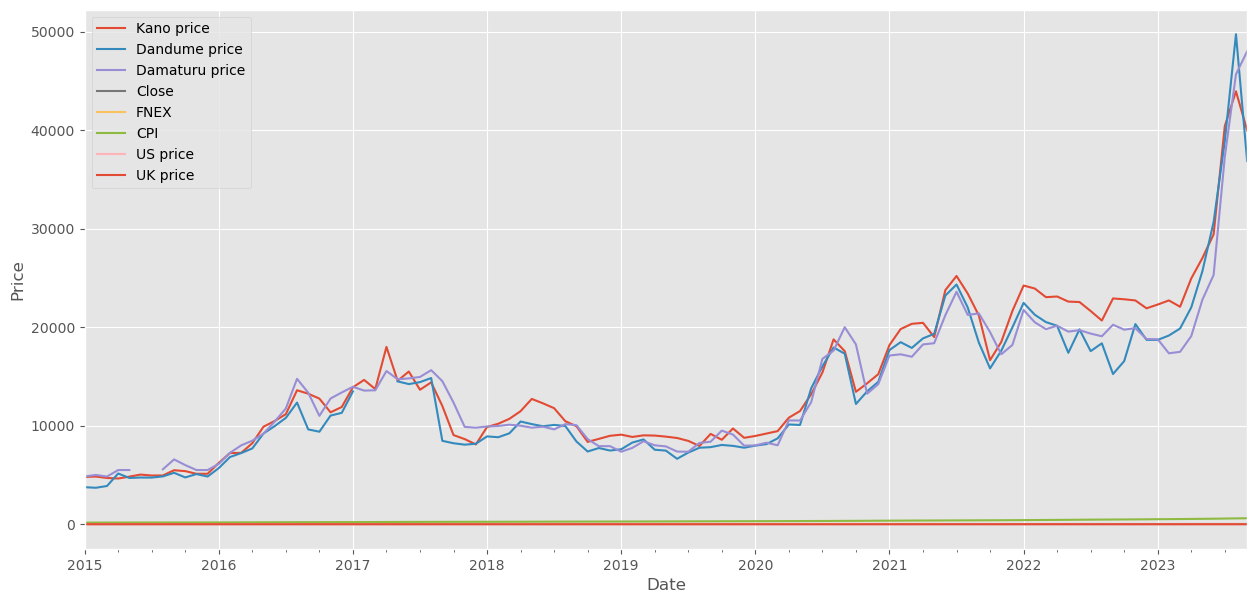

In [67]:
plt.rcParams['figure.figsize']=(15,7)
style.use('ggplot')
df.plot(y = continuous_features)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

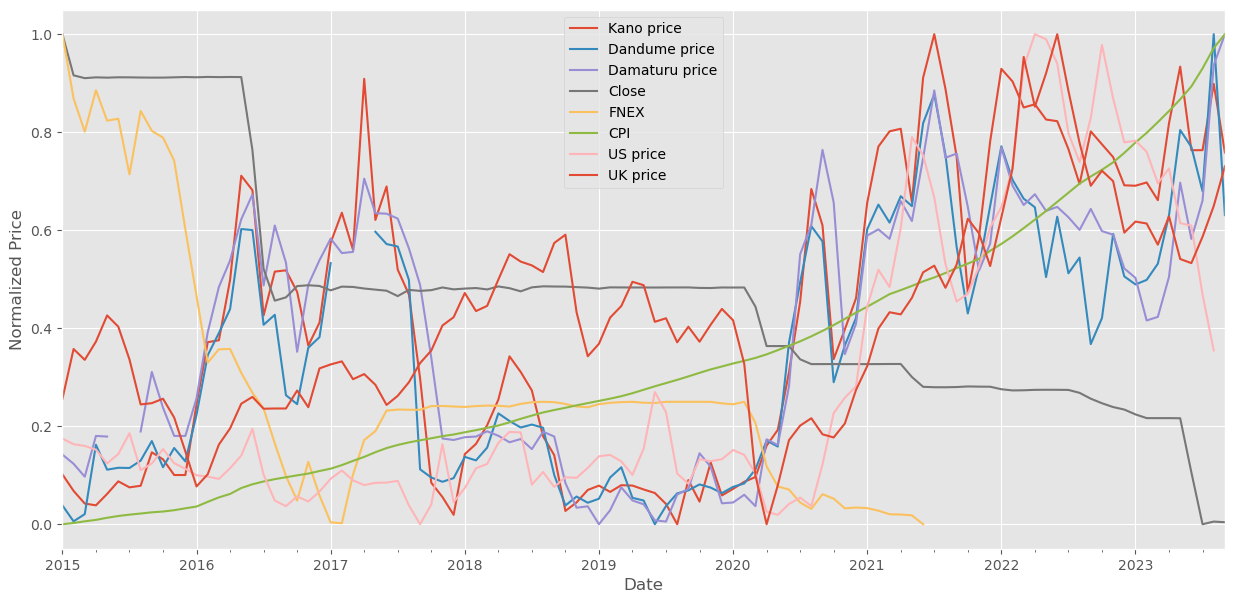

In [22]:
#Normalization can mislead since we don't have info about the scale or the values domain 
df_min_max_scaled = df.copy()
for column in df:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())
df_min_max_scaled.plot(y = continuous_features)
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.show()

In [ ]:
continuous_features = [feature for feature in df_g.columns if df_g[feature].dtypes != 'O']
print(continuous_features)

In [ ]:
style.use('ggplot')
df_g.plot(y = continuous_features)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [17]:
def adf_test(timeseries):
    dftest = adfuller(timeseries, autolag='AIC', regression='ct')
    result = pd.Series(dftest[0:4], index=['Test Statistic','P-value','Lags Used','No of Observations'])
    for key,value in dftest[4].items():
        result['Critical Value (%s)'%key] = value
    return result

In [17]:
#['exchange_rate', 'Kananga_Maize_Grain_price', 'Mbuji_Maize_Grain_price', 'Kinshasa_Maize_Grain_price'] 'inflation_rate', 'exchange_rate', 'Bamenda price', 'Fundong price', 'Kumbo price', 'Ndop price', 'Nkambe price', 'Wum price'

#maize_meal[['exchange_rate']].fillna(value='NA').to_csv('maize_meal.csv', index=False)
#maize_meal[['Kananga_Maize_meal_price']].fillna(value='NA').to_csv('maize_meal_ka.csv', index=False)
#maize_meal[['Mbuji_Maize_meal_price']].fillna(value='NA').to_csv('maize_meal_mbu.csv', index=False)
#maize_meal[['Lumumbashi_Maize_meal_price']].fillna(value='NA').to_csv('maize_meal_ki.csv', index=False)
maize_meal=maize_meal.fillna(value='NA')
maize_meal[['inflation_rate']].to_csv('inflation_rate.csv', index=False)
maize_meal[['Bamenda price']].to_csv('Bamenda_price.csv', index=False)
maize_meal[['Fundong price']].to_csv('Fundong_price.csv', index=False)
maize_meal[['Kumbo price']].to_csv('Kumbo_price.csv', index=False)
maize_meal[['Ndop price']].to_csv('Ndop_price.csv', index=False)
maize_meal[['Nkambe price']].to_csv('Nkambe_price.csv', index=False)
maize_meal[['Wum price']].to_csv('Wum_price.csv', index=False)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 2015-01-31 to 2023-09-30
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Kano price      105 non-null    float64
 1   Dandume price   102 non-null    float64
 2   Damaturu price  103 non-null    float64
 3   Close           105 non-null    float64
 4   FNEX            78 non-null     float64
 5   CPI             105 non-null    float64
 6   US price        105 non-null    float64
 7   UK price        105 non-null    float64
dtypes: float64(8)
memory usage: 7.4 KB


In [19]:
maize_meal=maize_meal.fillna(value='NA')
maize_meal[['Dandume price']].to_csv('Dandume_price.csv', index=False)
maize_meal[['Damaturu price']].to_csv('Damaturu_price.csv', index=False)
#maize_meal[['FNEX']].to_csv('FNEX.csv', index=False)
#maize_meal[['US price']].to_csv('US_price_val.csv', index=False)

In [ ]:
# imputed missing values using Kalman smoothing
#maize_meal_1=pd.read_csv('rate.csv')
#maize_meal_2=pd.read_csv('ka.csv')
#maize_meal_3=pd.read_csv('mbu.csv')
#maize_meal_4=pd.read_csv('ki.csv')
#maize_meal=pd.concat([maize_meal[['period_date']], maize_meal_1, maize_meal_2, maize_meal_3, maize_meal_4], axis=1)

# imputed missing values using Kalman smoothing
maize_meal_1=pd.read_csv('Bamenda_price_imp.csv')
maize_meal_2=pd.read_csv('Fundong_price_imp.csv')
maize_meal_3=pd.read_csv('Kumbo_price_imp.csv')
maize_meal_4=pd.read_csv('Ndop_price_imp.csv')
maize_meal_5=pd.read_csv('Nkambe_price_imp.csv')
maize_meal_6=pd.read_csv('Wum_price_imp.csv')
maize_meal_7=pd.read_csv('inflation_rate_imp.csv')
maize_meal=pd.concat([maize_meal[['date', 'exchange_rate']], maize_meal_1, maize_meal_2, maize_meal_3, maize_meal_4, maize_meal_5, maize_meal_6, maize_meal_7], axis=1)

In [20]:
# imputed missing values using Kalman smoothing
maize_meal_1=pd.read_csv('Dandume_price_imp.csv').drop('Unnamed: 0', axis = 1)
maize_meal_2=pd.read_csv('Damaturu_price_imp.csv').drop('Unnamed: 0', axis = 1)
maize_meal_3=pd.read_csv('FNEX_imp.csv').drop('Unnamed: 0', axis = 1)
#maize_meal_4=pd.read_csv('US_price_imp.csv').drop('Unnamed: 0', axis = 1)
#maize_meal=pd.concat([maize_meal_1, maize_meal_2, maize_meal_3, maize_meal_4], axis=1)
maize_meal=pd.concat([maize_meal_1, maize_meal_2, maize_meal_3], axis=1)

In [21]:
df_=df.reset_index()
df_['Dandume_price_imp']=maize_meal_1['Dandume.price']
df_['Damaturu_price_imp']=maize_meal_2['Damaturu.price']
df_['FNEX_imp']=maize_meal_3['FNEX']
#df_['US_price_imp']=maize_meal_4['US.price']

In [22]:
df_=df_.set_index('index')
#dff=df.reset_index().rename(columns={'index':'date'})
#df_=df_[['Kano price', 'Close', 'CPI', 'UK price', 'Dandume_price_imp', 'Damaturu_price_imp', 'FNEX_imp', 'US_price_imp']]
df_=df_[['Kano price', 'Close', 'CPI', 'UK price', 'US price', 'Dandume_price_imp', 'Damaturu_price_imp', 'FNEX_imp']]
#df_.index=pd.to_datetime(dff['date'])

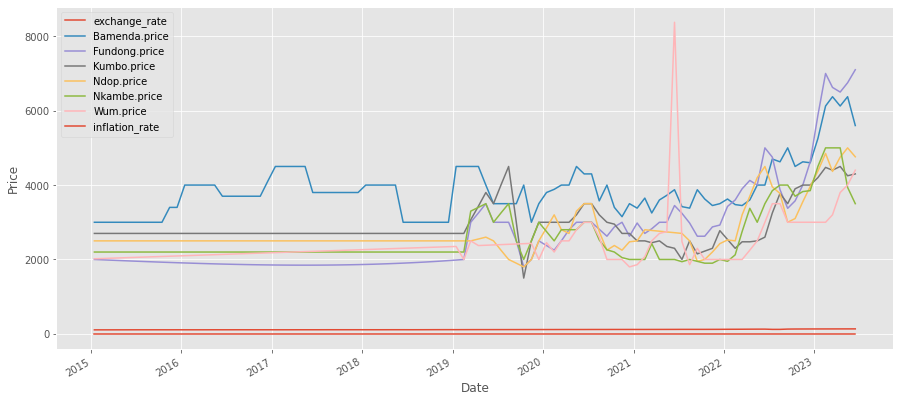

In [19]:
# Imputed Time series
df=maize_meal.drop('Unnamed: 0', axis = 1).copy()
df.index = pd.to_datetime(df['date'])
df.drop('date', inplace = True, axis = 1)
continuous_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
plt.rcParams['figure.figsize']=(15,7)
style.use('ggplot')
df.plot(y = continuous_features)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

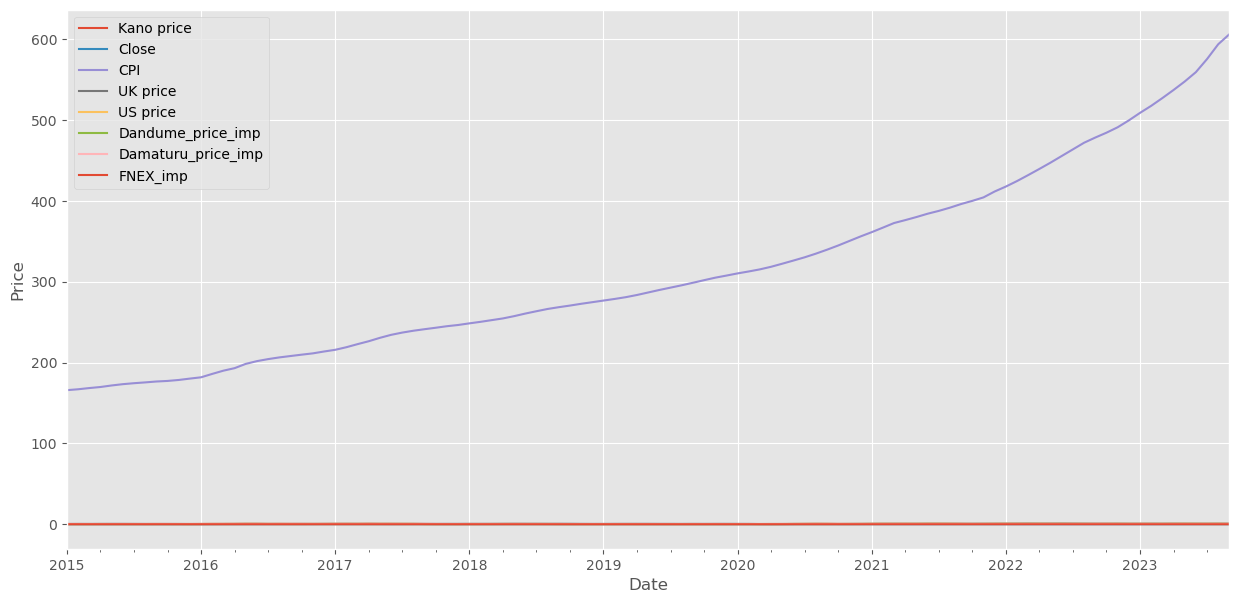

In [23]:
continuous_features = [feature for feature in df_.columns if df_[feature].dtypes != 'O']
plt.rcParams['figure.figsize']=(15,7)
style.use('ggplot')
df_.plot(y = continuous_features)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [24]:
maize_meal=df_.reset_index().drop('index', axis=1)
maize_meal.apply(adf_test, axis = 0)

,Kano price,Close,CPI,UK price,US price,Dandume_price_imp,Damaturu_price_imp,FNEX_imp
Test Statistic,-2.299879,-2.472305,2.408520,-2.852908,-2.017430,-2.263346,-1.539110,-4.947533
P-value,0.434017,0.341944,1.000000,0.178191,0.591908,0.454321,0.815367,0.000256
Lags Used,0.000000,3.000000,13.000000,1.000000,2.000000,12.000000,4.000000,10.000000
No of Observations,104.000000,101.000000,91.000000,103.000000,102.000000,92.000000,100.000000,94.000000
Critical Value (1%),-4.048567,-4.051322,-4.061866,-4.049467,-4.050385,-4.060704,-4.052278,-4.058458
Critical Value (5%),-3.453581,-3.454889,-3.459888,-3.454008,-3.454444,-3.459338,-3.455343,-3.458274
Critical Value (10%),-3.152294,-3.153056,-3.155967,-3.152543,-3.152797,-3.155647,-3.153321,-3.155028


In [20]:
#adf_table = maize_meal.drop(['period_date', 'Unnamed: 0'], axis = 1)
adf_table = maize_meal.drop(['date', 'Unnamed: 0'], axis = 1)
adf_table.apply(adf_test, axis = 0)

,exchange_rate,Bamenda.price,Fundong.price,Kumbo.price,Ndop.price,Nkambe.price,Wum.price,inflation_rate
Test Statistic,-2.504813,-0.900932,3.830190,-1.143110,-0.200951,-2.200614,-6.516641e+00,2.684886
P-value,0.114308,0.787665,1.000000,0.697578,0.938408,0.206023,1.067264e-08,0.999086
Lags Used,1.000000,12.000000,9.000000,2.000000,12.000000,1.000000,0.000000e+00,11.000000
No of Observations,100.000000,89.000000,92.000000,99.000000,89.000000,100.000000,1.010000e+02,90.000000
Critical Value (1%),-3.497501,-3.506057,-3.503515,-3.498198,-3.506057,-3.497501,-3.496818e+00,-3.505190
Critical Value (5%),-2.890906,-2.894607,-2.893508,-2.891208,-2.894607,-2.890906,-2.890611e+00,-2.894232
Critical Value (10%),-2.582435,-2.584410,-2.583824,-2.582596,-2.584410,-2.582435,-2.582277e+00,-2.584210


In [26]:
def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

In [27]:
maize_meal.apply(kpss_test, axis = 0)

Results of KPSS Test:
Test Statistic           0.851347
p-value                  0.010000
Lags Used                5.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64
Results of KPSS Test:
Test Statistic           1.533245
p-value                  0.010000
Lags Used                5.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64
Results of KPSS Test:
Test Statistic           1.526641
p-value                  0.010000
Lags Used                6.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64
Results of KPSS Test:
Test Statistic           0.871523
p-value                  0.010000
Lags Used                5.000000
Critical Value (10%)     0.347000
Critical Value (5

Kano price            None
Close                 None
CPI                   None
UK price              None
US price              None
Dandume_price_imp     None
Damaturu_price_imp    None
FNEX_imp              None
dtype: object

In [22]:
adf_table = maize_meal.drop(['date', 'Unnamed: 0'], axis = 1)
adf_table.apply(kpss_test, axis = 0)

Results of KPSS Test:
Test Statistic           0.112816
p-value                  0.100000
Lags Used                5.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64
Results of KPSS Test:
Test Statistic           0.528287
p-value                  0.035296
Lags Used                5.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64
Results of KPSS Test:
Test Statistic           1.288366
p-value                  0.010000
Lags Used                5.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64
Results of KPSS Test:
Test Statistic           0.38695
p-value                  0.08278
Lags Used                5.00000
Critical Value (10%)     0.34700
Critical Value (5%)  

exchange_rate     None
Bamenda.price     None
Fundong.price     None
Kumbo.price       None
Ndop.price        None
Nkambe.price      None
Wum.price         None
inflation_rate    None
dtype: object

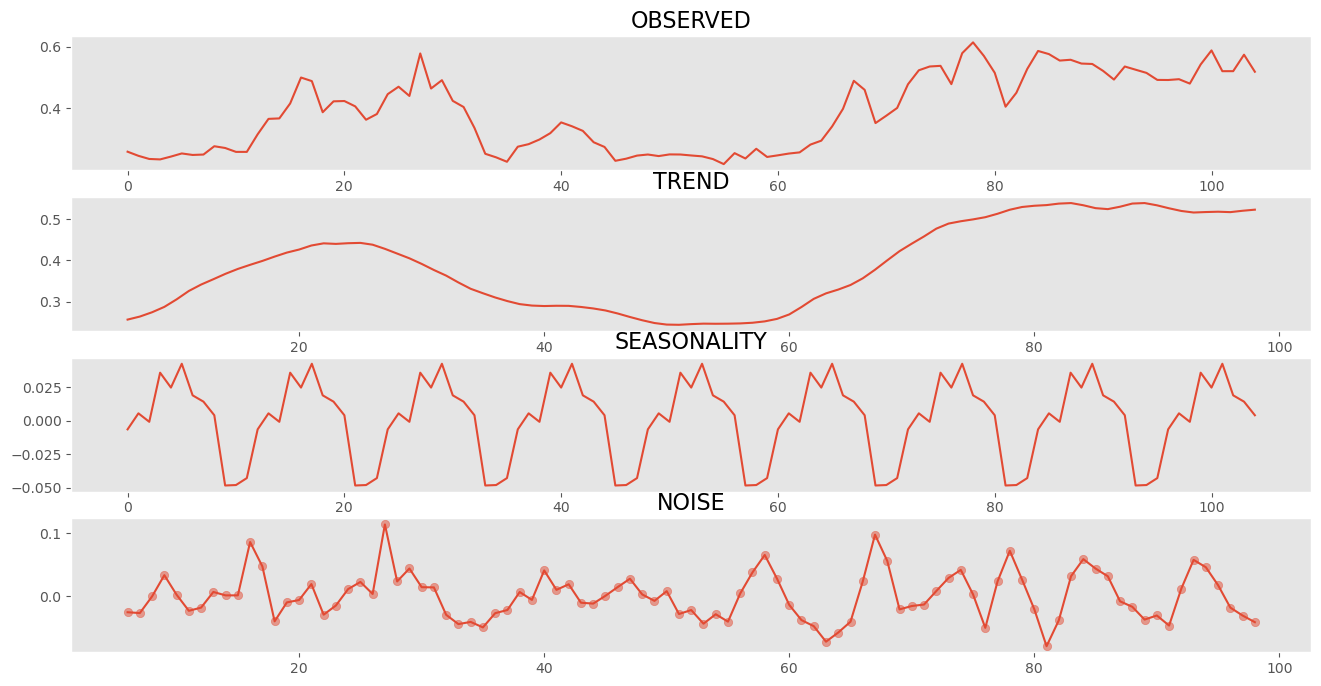

In [28]:
#res = seasonal_decompose(maize_meal.drop('Unnamed: 0', axis = 1)['Bamenda.price'].values, period=12)
res = seasonal_decompose(maize_meal['Kano price'].values, period=12)

    
observed = res.observed
trend = res.trend
seasonal = res.seasonal
residual = res.resid
    
#plot the complete time series
fig, axs = plt.subplots(4, figsize=(16,8))
axs[0].set_title('OBSERVED', fontsize=16)
axs[0].plot(observed)
axs[0].grid()
    
#plot the trend of the time series
axs[1].set_title('TREND', fontsize=16)
axs[1].plot(trend)
axs[1].grid()
    
#plot the seasonality of the time series. Period=24 daily seasonality | Period=24*7 weekly seasonality.
axs[2].set_title('SEASONALITY', fontsize=16)
axs[2].plot(seasonal)
axs[2].grid()
    
#plot the noise of the time series
axs[3].set_title('NOISE', fontsize=16)
axs[3].plot(residual)
axs[3].scatter(y=residual, x=range(len(residual)), alpha=0.5)
axs[3].grid()
    
plt.show()

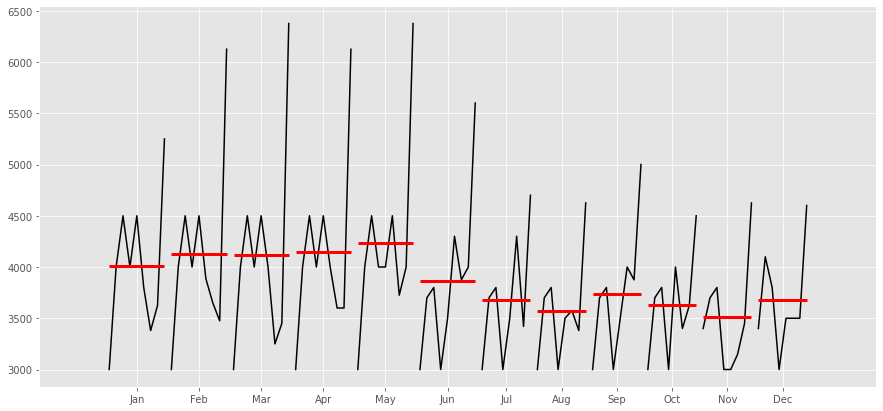

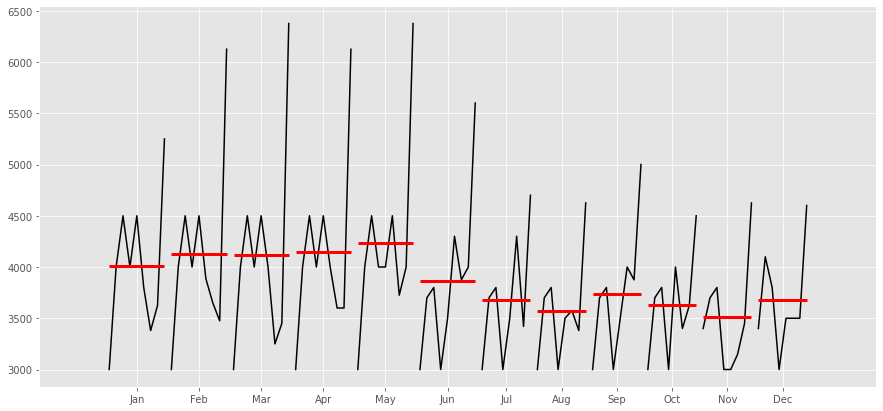

In [24]:
y=y_maize[['date']].drop_duplicates()
y=y[~y['date'].str.contains('2023-07')]
maize_meal=pd.concat([maize_meal, y[['date']].rename(columns={'date':'date_'})], axis=1)
dff=maize_meal.drop('Unnamed: 0', axis=1)[['date_', 'Bamenda.price']]
dff=dff.set_index('date_')
dates=pd.to_datetime(dff.index.values)
dff.index = pd.DatetimeIndex(dates, freq='M')
month_plot(dff)

In [25]:
maize_meal=maize_meal.drop(['Unnamed: 0'], axis = 1)

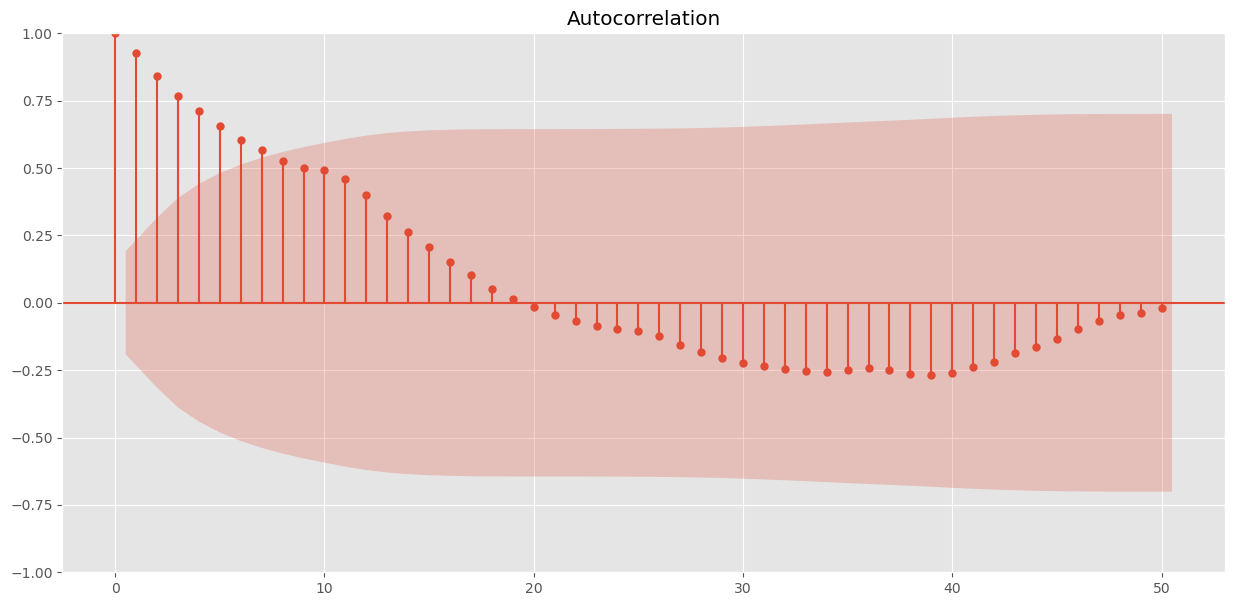

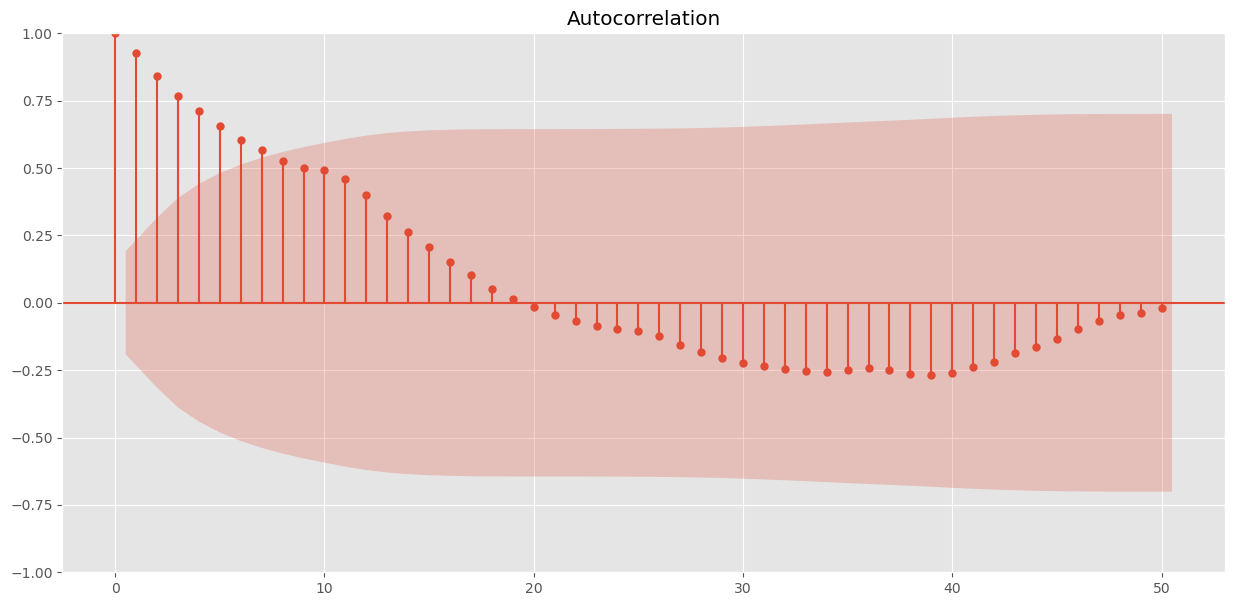

In [29]:
#plot_acf(maize_meal['Bamenda.price'].values, lags=50)
plot_acf(maize_meal['Kano price'].values, lags=50)

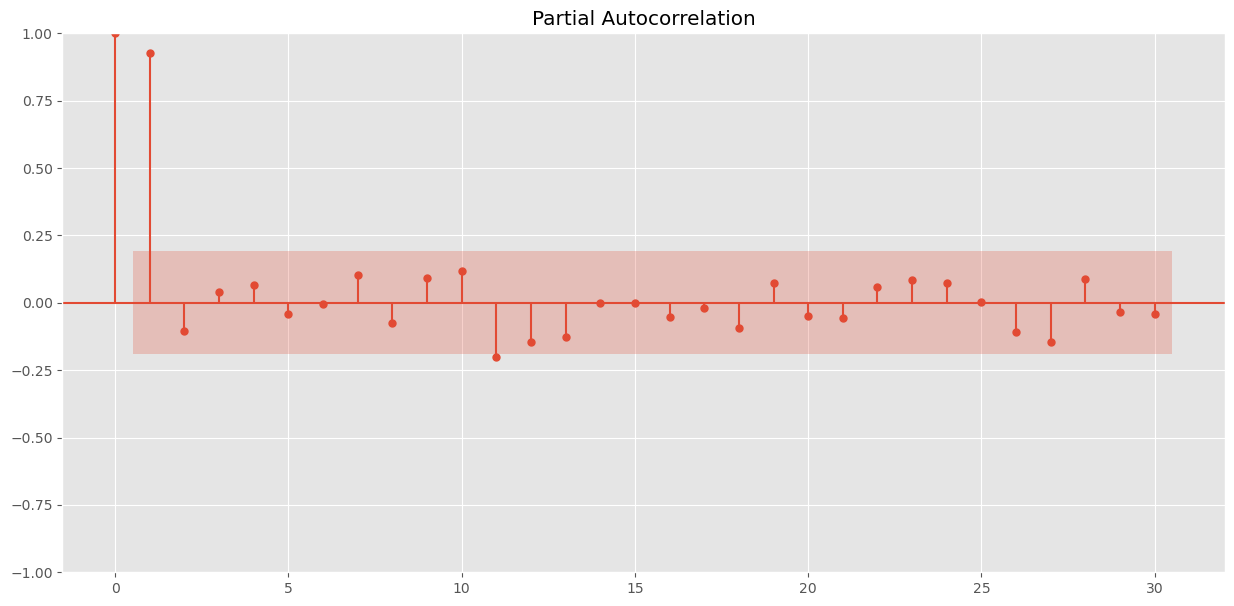

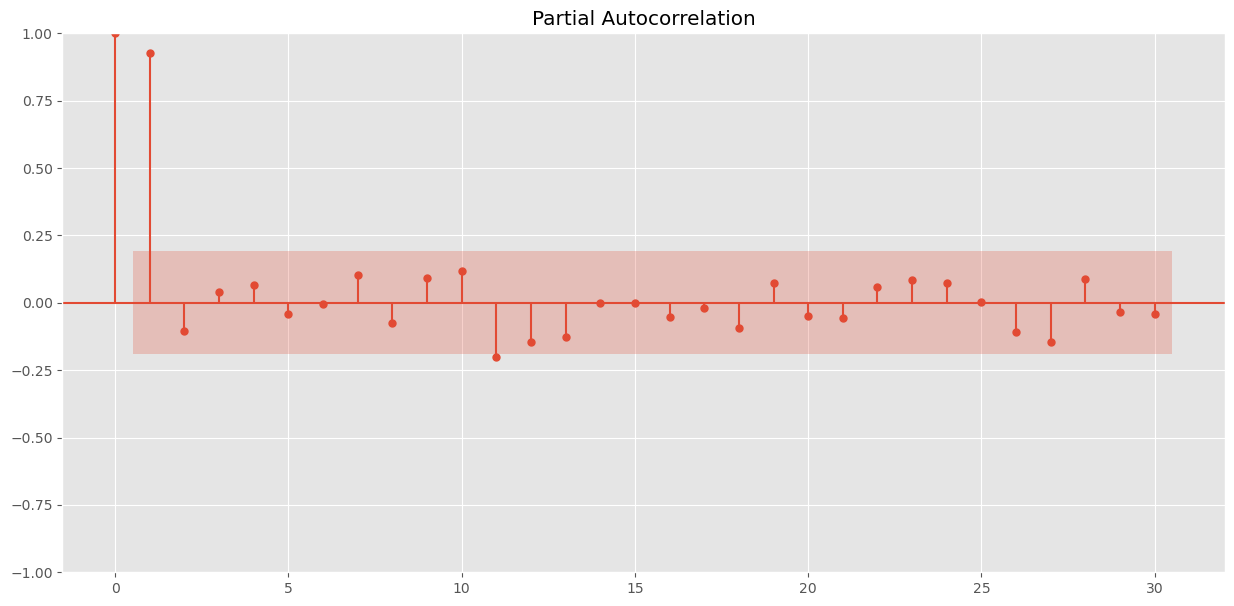

In [30]:
#plot_pacf(maize_meal['Bamenda.price'].values, lags=30)
plot_pacf(maize_meal['Kano price'].values, lags=30)

In [28]:
#maize_meal['Lumumbashi_Maize_meal_price_diff'] = maize_meal['Lumumbashi_Maize_meal_price'] - maize_meal['Lumumbashi_Maize_meal_price'].shift(1)
#maize_meal['exchange_rate_diff'].dropna().plot(figsize=(12, 8))
#maize_meal['exchange_rate_diff'] = maize_meal['exchange_rate'] - maize_meal['exchange_rate'].shift(1)


maize_meal['Wum.price_diff'] = maize_meal['Wum.price'] - maize_meal['Wum.price'].shift(1)
#maize_meal['exchange_rate_diff'].dropna().plot(figsize=(12, 8))
maize_meal['Kumbo.price_diff'] = maize_meal['Kumbo.price'] - maize_meal['Kumbo.price'].shift(1)
maize_meal['exchange_rate_diff'] = maize_meal['exchange_rate'] - maize_meal['exchange_rate'].shift(1)

maize_meal['Fundong.price_diff'] = maize_meal['Fundong.price'] - maize_meal['Fundong.price'].shift(1)
maize_meal['Ndop.price_diff'] = maize_meal['Ndop.price'] - maize_meal['Ndop.price'].shift(1)
maize_meal['Nkambe.price_diff'] = maize_meal['Nkambe.price'] - maize_meal['Nkambe.price'].shift(1)
maize_meal['inflation_rate_diff'] = maize_meal['inflation_rate'] - maize_meal['inflation_rate'].shift(1)

In [31]:
maize_meal['Kano price_diff'] = maize_meal['Kano price'] - maize_meal['Kano price'].shift(1)
#maize_meal['exchange_rate_diff'].dropna().plot(figsize=(12, 8))
maize_meal['Close_diff'] = maize_meal['Close'] - maize_meal['Close'].shift(1)
maize_meal['CPI_diff'] = maize_meal['CPI'] - maize_meal['CPI'].shift(1)

maize_meal['UK price_diff'] = maize_meal['UK price'] - maize_meal['UK price'].shift(1)
maize_meal['Dandume_price_imp_diff'] = maize_meal['Dandume_price_imp'] - maize_meal['Dandume_price_imp'].shift(1)
maize_meal['Damaturu_price_imp_diff'] = maize_meal['Damaturu_price_imp'] - maize_meal['Damaturu_price_imp'].shift(1)
maize_meal['FNEX_imp_diff'] = maize_meal['FNEX_imp'] - maize_meal['FNEX_imp'].shift(1)
#maize_meal['US_price_imp_diff'] = maize_meal['US_price_imp'] - maize_meal['US_price_imp'].shift(1)
maize_meal['US_price_diff'] = maize_meal['US price'] - maize_meal['US price'].shift(1)

In [29]:
maize_meal['exchange_rate_box'] = boxcox(maize_meal['exchange_rate'])[0]
#maize_meal['Lumumbashi_Maize_meal_price_box'] = boxcox(maize_meal['Lumumbashi_Maize_meal_price'])[0]


In [30]:
maize_meal['Bamenda.price_price_diff'] = maize_meal['Bamenda.price'] - maize_meal['Bamenda.price'].shift(1)


In [32]:
maize_meal['Kano price_box'] = boxcox(maize_meal['Kano price'])[0]
#maize_meal['exchange_rate_diff'].dropna().plot(figsize=(12, 8))
maize_meal['Close_box'] = boxcox(maize_meal['Close'])[0]
maize_meal['CPI_box'] = boxcox(maize_meal['CPI'])[0]

maize_meal['UK price_box'] = boxcox(maize_meal['UK price'])[0]
maize_meal['Dandume_price_imp_box'] = boxcox(maize_meal['Dandume_price_imp'])[0]
maize_meal['Damaturu_price_imp_box'] = boxcox(maize_meal['Damaturu_price_imp'])[0]
maize_meal['FNEX_imp_box'] = boxcox(maize_meal['FNEX_imp'])[0]
#maize_meal['US_price_imp_box'] = boxcox(maize_meal['US_price_imp'])[0]
maize_meal['US price_box'] = boxcox(maize_meal['US price'])[0]

<Axes: >

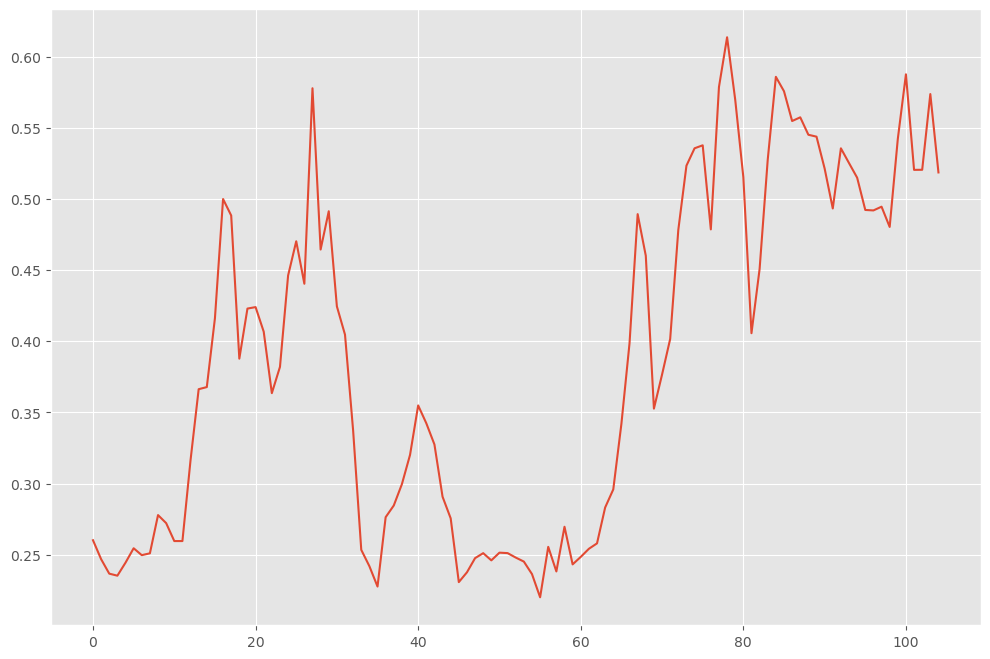

In [88]:
maize_meal['Bamenda.price_price_box'] = boxcox(maize_meal['Bamenda.price'])[0]
maize_meal['Bamenda.price_price_box'].plot(figsize=(12, 8))

In [1]:
#df
#adf_test(d_af['Fatalities After_coup'])

#Determine rolling statistics
#d_bf["rolling_avg"] = d_bf['Fatalities Before_coup'].rolling(window=7).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
#d_bf["rolling_std"] = d_bf['Fatalities Before_coup'].rolling(window=7).std()

#Plot rolling statistics
#plt.figure(figsize=(15,7))
#plt.plot(d_bf['Fatalities Before_coup'], color='#379BDB', label='Original')
#plt.plot(d_bf["rolling_avg"], color='#D22A0D', label='Rolling Mean')
#plt.plot(d_bf["rolling_std"], color='#142039', label='Rolling Std')
#plt.legend(loc='best')
#plt.title('Rolling Mean & Standard Deviation')
#plt.show(block=True)
#fig, ax = plt.subplots(figsize = (12,8))
#sns.boxplot(data=d_baf, x='event', y = 'fatalities',  ax = ax);
#sns.swarmplot(data=d_baf, x='event', y = 'fatalities');
#growth = d_baf.groupby('event')["rolling_std"].sum().pct_change()
#growth*100


In [140]:
adf_test(maize_meal['Bamenda.price_price_diff'].dropna())

Test Statistic           -5.300811
P-value                   0.000056
Lags Used                 2.000000
No of Observations      101.000000
Critical Value (1%)      -4.051322
Critical Value (5%)      -3.454889
Critical Value (10%)     -3.153056
dtype: float64

In [141]:
kpss_test(maize_meal['Bamenda.price_price_diff'].dropna())

Results of KPSS Test:
Test Statistic           0.31451
p-value                  0.10000
Lags Used                3.00000
Critical Value (10%)     0.34700
Critical Value (5%)      0.46300
Critical Value (2.5%)    0.57400
Critical Value (1%)      0.73900
dtype: float64


In [35]:
from scipy import signal
def ccf_values(series1, series2):
    p = series1
    q = series2
    p = (p - np.mean(p)) / (np.std(p) * len(p))
    q = (q - np.mean(q)) / (np.std(q))  
    c = np.correlate(p, q, 'full')
    return c
    
ccf_ielts = ccf_values(maize_meal['Bamenda.price_price_diff'].dropna(), maize_meal['Nkambe.price_diff'].dropna())
ccf_ielts

array([ 1.18494368e-03,  4.01428570e-03,  4.04815054e-03,  4.08201537e-03,
        2.80036154e-03,  1.12405210e-03,  1.09214100e-03,  7.97126167e-04,
        1.62030221e-03, -1.67580347e-02, -4.26702459e-02, -2.77381321e-02,
       -6.73469165e-02,  1.92708457e-02,  2.37926531e-02,  2.72924037e-02,
        5.39617269e-02,  1.75886124e-02,  3.17833520e-03, -1.67179079e-02,
       -5.30986620e-03,  5.58714708e-03, -1.72926417e-02, -1.40498644e-02,
       -3.67573326e-02,  4.04421801e-02,  4.82374365e-02,  4.61311717e-02,
        3.64823214e-02,  9.37511235e-02, -3.21795425e-02, -3.54306710e-02,
       -4.37219650e-02, -2.33162984e-02,  2.50330425e-02, -3.15622843e-02,
        2.69685221e-02,  2.47030962e-02,  4.43606037e-02, -1.25058378e-02,
        1.75566382e-02,  1.34609515e-01, -5.23798790e-02, -9.35217656e-02,
       -8.05720743e-02, -7.91846656e-02, -2.54112539e-03, -5.44269677e-02,
       -1.39901167e-01,  1.37142662e-02,  3.24957139e-02,  7.32449914e-02,
        1.18830478e-01,  

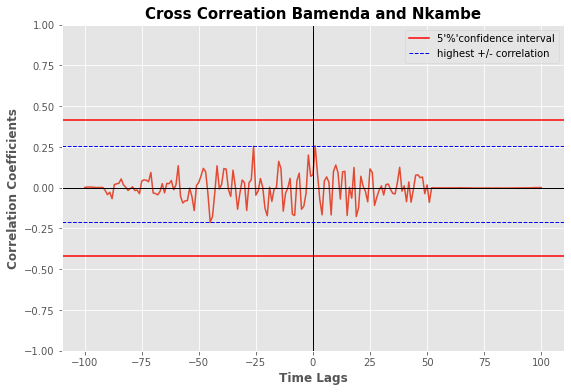

In [36]:
lags = signal.correlation_lags(len(maize_meal['Bamenda.price_price_diff'].dropna()), len(maize_meal['Nkambe.price_diff'].dropna()))

def ccf_plot(lags, ccf):
    fig, ax =plt.subplots(figsize=(9, 6))
    ax.plot(lags, ccf)
    ax.axhline(-2/np.sqrt(23), color='red', label="5'%'confidence interval")
    ax.axhline(2/np.sqrt(23), color='red')
    ax.axvline(x = 0, color = 'black', lw = 1)
    ax.axhline(y = 0, color = 'black', lw = 1)
    ax.axhline(y = np.max(ccf), color = 'blue', lw = 1, 
    linestyle='--', label = 'highest +/- correlation')
    ax.axhline(y = np.min(ccf), color = 'blue', lw = 1, 
    linestyle='--')
    ax.set(ylim = [-1, 1])
    ax.set_title('Cross Correation Bamenda and Nkambe', weight='bold', fontsize = 15)
    ax.set_ylabel('Correlation Coefficients', weight='bold', 
    fontsize = 12)
    ax.set_xlabel('Time Lags', weight='bold', fontsize = 12)
    plt.legend()
    
ccf_plot(lags, ccf_ielts)

In [ ]:
#pip install mlcausality@git+https://github.com/WojtekFulmyk/mlcausality.git

In [33]:
#!pip install pmdarima --quiet
import pmdarima as pm
from sklearn.model_selection import TimeSeriesSplit
from scipy.stats import normaltest
import mlcausality

Granger Causality

In [43]:
help(mlcausality)

Help on module mlcausality:

NAME
    mlcausality

FUNCTIONS
    bivariate_mlcausality(data, lags, permute_list=None, y_bounds_violation_sign_drop=True, ftest=False, return_pvalue_matrix_only=False, pvalue_matrix_type='sign_test', **kwargs)
        This function takes several time-series in a single 'data'
        parameter as an input and checks for Granger causal relationships
        between all bivariate combinations of those time-series.
        Internally, all relationships are are tested using mlcausality().
        
        Returns : pandas.DataFrame unless return_pvalue_matrix_only==True,
        in which case a numpy array with pvalues is returned instead.
        
        Example usage:
        import mlcausality
        import numpy as np
        import pandas as pd
        data = np.random.random([1000,5])
        z = mlcausality.bivariate_mlcausality(data=data,lags=[5,10],
            regressor='krr',
            regressor_params={'kernel':'rbf'})
        
        Paramet

In [50]:
#dff

In [34]:
dff=df_.reset_index().drop('index', axis=1)
#dff
#maize_meal
#mlcausality.bivariate_mlcausality(dff, lags=[7, 12], y_bounds_violation_sign_drop=False, ftest=False, regressor='xgbregressor')
mlcausality.mlcausality(dff.drop('Kano price', axis=1), dff[['Kano price']], lag=6, regressor='xgbregressor', y_bounds_error='ignore', y_bounds_violation_sign_drop=False)

########## SUMMARY ##########
  lag: 6
  train_obs: 74
  effective_train_obs: 68
  test_obs: 31
  effective_test_obs: 25
  outside_bounds_frac: 0.08
sign_test
    statistic: 0.96
    pvalue: 7.748603820800781e-07
    y_bounds_violation_sign_drop: False
    sign_test_num_preds: 25
wilcoxon
    statistic: 318.0
    pvalue: 5.662441253662109e-07
    y_bounds_violation_sign_drop: False
    wilcoxon_num_preds: 25


{'summary': {'lag': 6,
  'train_obs': 74,
  'effective_train_obs': 68,
  'test_obs': 31,
  'effective_test_obs': 25,
  'outside_bounds_frac': 0.08,
  'sign_test': {'statistic': 0.96,
   'pvalue': 7.748603820800781e-07,
   'y_bounds_violation_sign_drop': False,
   'sign_test_num_preds': 25},
  'wilcoxon': {'statistic': 318.0,
   'pvalue': 5.662441253662109e-07,
   'y_bounds_violation_sign_drop': False,
   'wilcoxon_num_preds': 25}},
 'summary_df':    lag  train_obs  effective_train_obs  test_obs  effective_test_obs  \
 0    6         74                   68        31                  25   
 
    outside_bounds_frac  sign_test.statistic  sign_test.pvalue  \
 0                 0.08                 0.96      7.748604e-07   
 
    sign_test.y_bounds_violation_sign_drop  sign_test.sign_test_num_preds  \
 0                                   False                             25   
 
    wilcoxon.statistic  wilcoxon.pvalue  wilcoxon.wilcoxon_num_preds  \
 0               318.0     5.662441e-07 

In [38]:
#maize_meal['period_date']=pd.to_datetime(maize_meal['period_date'])
#dfm=maize_meal.drop('Unnamed: 0', axis=1).set_index('period_date')

maize_meal['date_']=pd.to_datetime(maize_meal['date_'])
dfm=maize_meal.set_index('date_')

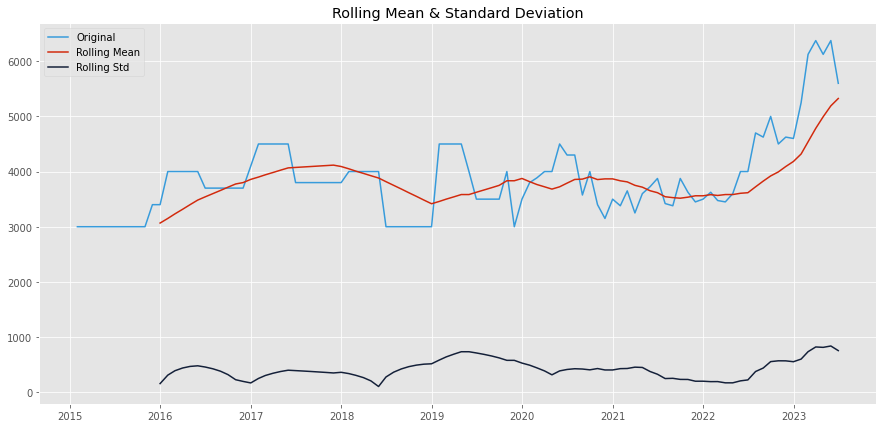

In [39]:
#Determine rolling statistics
dfm["rolling_avg"] = dfm["Bamenda.price"].rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
dfm["rolling_std"] = dfm["Bamenda.price"].rolling(window=12).std()

#Plot rolling statistics
plt.figure(figsize=(15,7))
plt.plot(dfm["Bamenda.price"], color='#379BDB', label='Original')
plt.plot(dfm["rolling_avg"], color='#D22A0D', label='Rolling Mean')
plt.plot(dfm["rolling_std"], color='#142039', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=True)

In [40]:
def MAPE(y_true, y_pred): 
    """
    %Error compares true value with predicted value. Lower the better. Use this along with rmse(). If the series has 
    outliers, compare/select model using MAPE instead of rmse()
    
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def HWGrid(train, test, seasonal_periods):
    """
    Author: Sandeep Pawar twitter: @PawarBI
    Functions returns a dataframe with parameters of the Holt-Winter's method and corresponding train & test evaluation scores. 
    It also does a quick check of the residuals using Ljung-Box test and Shapiro test for normality. 
    Residuals must be uncorrelated. 
    
    train: (pandas series)
        -  Training data
        
    test: (pandas series)
        -  Test data
    
    Seasonal_periods: int
        - No of seasonas in the time period. e.g. 4 for Quarterly, 12 for Monthly, 52 for Weekly data
        
    """
    import itertools
    from statsmodels.tools.eval_measures import rmse


    trend      = ['add','mul']
    seasonal   = ['add','mul']
    damped     = [False, True]
    use_boxcox = [False, True, 'log']

    params = itertools.product(trend,seasonal,damped,use_boxcox)

    result_df = pd.DataFrame(columns=['Trend', 'Seasonal', 'Damped', 'BoxCox','AICc Train',  
                                      '%MAPE_Train', 'RMSE_Train', '%MAPE_Test', 
                                      'RMSE_Test', "Resid_LJ", "Resid_Norm","Resid_mean" ])
    
    
    for trend,seasonal,damped,use_boxcox in params:
    
            model = ExponentialSmoothing(train, 
                                     trend=trend,
                                     damped=damped,
                                     seasonal=seasonal,
                                     seasonal_periods=seasonal_periods).fit(use_boxcox=use_boxcox)
    
    
            
            mape1=MAPE(train,model.fittedvalues) 
            rmse1=rmse(train,model.fittedvalues)

            mape2=MAPE(test,model.forecast(len(test))) 
            rmse2=rmse(test,model.forecast(len(test)))

            aicc1 = model.aicc.round(1)

               
    
            lj_p_val = np.mean(ljung(x=model.resid, lags=10)[1])
            norm_p_val =  jb(model.resid)[1]#shapiro(model.resid)[1]
    
            lj = "Uncorrelated" if lj_p_val > 0.05 else "Correlated"
            norm = "Normal" if norm_p_val > 0.05 else "Non-Normal"
            
    
            result_df = result_df.append({'Trend':trend       ,
                              'Seasonal': seasonal            ,
                              'Damped':damped                 ,
                              'BoxCox':use_boxcox             ,
                              '%MAPE_Train':np.round(mape1,2) ,
                              'RMSE_Train':np.round(rmse1,1)  ,
                              'AICc Train':aicc1              ,
                              '%MAPE_Test':np.round(mape2,2)  ,
                              'RMSE_Test':np.round(rmse2,1)   ,
                              'Resid_LJ' :lj                  ,
                              'Resid_Norm':norm               ,
                              'Resid_mean':np.round(model.resid.mean(),1)} , ignore_index=True, sort=False)
    
    
    return result_df.sort_values(by=["RMSE_Test", "%MAPE_Test","RMSE_Train","%MAPE_Train"]).style.format({"%MAPE_Train": "{:20,.2f}%", "%MAPE_Test": "{:20,.2f}%"}).highlight_min(color='lightgreen')

In [41]:
def hw_cv(series, seasonal_periods, initial_train_window, test_window):
    
    from statsmodels.tools.eval_measures import rmse
    import itertools
    import warnings
    warnings.filterwarnings("ignore")
    
    """
     Author: Sandeep Pawar
     Date: 4/15/2020
     Ver: 1.0
     
     Returns Rolling and Expanding cross-validation scores (avg rmse), along with model paramters
     for Triple Exponential Smoothing method. Expanding expands the training set each time by adding one observation, 
     while rolling slides the training and test by one observation each time. 
     
     Output shows parameters used and Rolling & Expanding cv scores. Output is in below order:
          1. Trend 2. Seasonal 3. Damped 4. use_boxcox 5. Rolling cv 6. Expanding cv 
     
     Requirements: Pandas, Numpy, Statsmodels, itertools, rmse 
     
     series: Pandas Series
             Time series 
     
     seasonal_periods: int
             No of seasonal periods in a full cycle (e.g. 4 in quarter, 12 in monthly, 52 in weekly data)
             
     initial_train_window: int
             Minimum training set length. Recommended to use minimum 2 * seasonal_periods
     
     test_window: int
             Test set length. Recommended to use equal to forecast horizon
             
     e.g. hw_cv(ts["Sales"], 4, 12, 6 )
          Output: add add False False    R: 41.3   ,E: 39.9

          
     Note: This function can take anywhere from 5-15 min to run full output        
    
     
    
    
    """
    
    
    def expanding_tscv(series,trend,seasonal,seasonal_periods,damped,boxcox,initial_train_window, test_window):
        i =  0
        x = initial_train_window
        t = test_window
        errors_roll=[]

        while (i+x+t) <len(series):
            train_ts=series[:(i+x)].values
            test_ts= series[(i+x):(i+x+t)].values
            model_roll = ExponentialSmoothing(train_ts,
                                         trend=trend,
                                         seasonal=seasonal,
                                         seasonal_periods=seasonal_periods,
                                         damped=damped,
                                         use_boxcox=boxcox).fit()

            fcast = model_roll.forecast(t)

            error_roll = rmse(test_ts, fcast)

            errors_roll.append(error_roll)

            i=i+1


        return np.mean(errors_roll).round(1)

    def rolling_tscv(series,trend,seasonal,seasonal_periods,damped,boxcox,initial_train_window, test_window):
        i =  0
        x = initial_train_window
        t = test_window
        errors_roll=[]

        while (i+x+t) <len(series):
            train_ts=series[(i):(i+x)].values
            test_ts= series[(i+x):(i+x+t)].values
            model_roll = ExponentialSmoothing(train_ts,
                                         trend=trend,
                                         seasonal=seasonal,
                                         seasonal_periods=seasonal_periods,
                                         damped=damped,
                                         use_boxcox=boxcox).fit()

            fcast = model_roll.forecast(t)

            error_roll = rmse(test_ts, fcast)

            errors_roll.append(error_roll)

            i=i+1

   
        return np.mean(errors_roll).round(1)
   
    trend      = ['add','mul']
    seasonal   = ['add','mul']
    damped     = [False, True]
    #use_boxcoxx =[False, True, 'log']
    use_boxcoxx =[False, True]

    params = itertools.product(trend,seasonal,damped,use_boxcoxx)

    for trend,seasonal,damped,use_boxcoxx in params:
        r=rolling_tscv(X["Bamenda.price"], trend, seasonal, 12, damped, use_boxcoxx, 60,6)
        e=expanding_tscv(X["Bamenda.price"], trend, seasonal, 12, damped, use_boxcoxx, 60,6)
        result = print(trend, seasonal, damped, use_boxcoxx,"   R:", r,"  ,E:", e)
          
    return result

In [42]:
def residcheck(residuals, lags):
    """
    Function to check if the residuals are white noise. Ideally the residuals should be uncorrelated, zero mean, 
    onstant variance and normally distributed. First two are must, while last two are good to have. 
    If the first two are not met, we have not fully captured the information from the data for prediction. 
    Consider different model and/or add exogenous variable. 
    
    If Ljung Box test shows p> 0.05, the residuals as a group are white noise. Some lags might still be significant. 
    
    Lags should be min(2*seasonal_period, T/5)
    
    plots from: https://tomaugspurger.github.io/modern-7-timeseries.html
    
    """
    resid_mean = np.mean(residuals)
    lj_p_val = np.mean(ljung(x=residuals, lags=lags)['lb_pvalue'])
    norm_p_val =  jb(residuals)[1]
    adfuller_p = adfuller(residuals)[1]
    
    
    
    fig = plt.figure(figsize=(10,8))
    layout = (2, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2);
    acf_ax = plt.subplot2grid(layout, (1, 0));
    kde_ax = plt.subplot2grid(layout, (1, 1));

    residuals.plot(ax=ts_ax)
    plot_acf(residuals, lags=lags, ax=acf_ax);
    sns.kdeplot(residuals);
    #[ax.set_xlim(1.5) for ax in [acf_ax, kde_ax]]
    sns.despine()
    plt.tight_layout();
    
    print("** Mean of the residuals: ", np.around(resid_mean,2))
    
    print("\n** Ljung Box Test, p-value:", np.around(lj_p_val,3), "(>0.05, Uncorrelated)" if (lj_p_val > 0.05) else "(<0.05, Correlated)")
    
    print("\n** Jarque Bera Normality Test, p_value:", np.around(norm_p_val,3), "(>0.05, Normal)" if (norm_p_val>0.05) else "(<0.05, Not-normal)")
    
    print("\n** AD Fuller, p_value:", np.around(adfuller_p,3), "(>0.05, Non-stationary)" if (adfuller_p > 0.05) else "(<0.05, Stationary)")
    
    
    
    return ts_ax, acf_ax, kde_ax

def pysnaive(train_series,seasonal_periods,forecast_horizon):
    '''
    Python implementation of Seasonal Naive Forecast. 
    This should work similar to https://otexts.com/fpp2/simple-methods.html
    Returns two arrays
     > fitted: Values fitted to the training dataset
     > fcast: seasonal naive forecast
    
    Author: Sandeep Pawar
    
    Date: Apr 9, 2020
    
    Ver: 1.0
    
    train_series: Pandas Series
        Training Series to be used for forecasting. This should be a valid Pandas Series. 
        Length of the Training set should be greater than or equal to number of seasonal periods
        
    Seasonal_periods: int
        No of seasonal periods
        Yearly=1
        Quarterly=4
        Monthly=12
        Weekly=52
        

    Forecast_horizon: int
        Number of values to forecast into the future
    
    e.g. 
    fitted_values = pysnaive(train,12,12)[0]
    fcast_values = pysnaive(train,12,12)[1]
    '''
    
    if len(train_series)>= seasonal_periods: #checking if there are enough observations in the training data
        
        last_season=train_series.iloc[-seasonal_periods:]
        
        reps=np.int(np.ceil(forecast_horizon/seasonal_periods))
        
        fcarray=np.tile(last_season,reps)
        
        fcast=pd.Series(fcarray[:forecast_horizon])
        
        fitted = train_series.shift(seasonal_periods)
        
    else:
        fcast=print("Length of the trainining set must be greater than number of seasonal periods") 
    
    return fitted, fcast

In [43]:
def accuracy(A,F):
    
    accuracy_df=pd.DataFrame()
    
    rms_error = np.round(rmse(A, F),1)
    
    map_error = np.round(np.mean(np.abs((np.array(A) - np.array(F)) / np.array(A))) * 100,1)

    smap_error=100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))
           
    accuracy_df=accuracy_df.append({"RMSE":rms_error, "%MAPE": map_error, "%SMAPE": smap_error}, ignore_index=True)
    
    return accuracy_df

In [44]:
class expanding_window(object):
    '''	
    Parameters 
    ----------
    
    Note that if you define a horizon that is too far, then subsequently the split will ignore horizon length 
    such that there is validation data left. This similar to Prof Rob hyndman's TsCv 
    
    
    initial: int
        initial train length 
    horizon: int 
        forecast horizon (forecast length). Default = 1
    period: int 
        length of train data to add each iteration 
    '''
    

    def __init__(self,initial= 1,horizon = 1,period = 1):
        self.initial = initial
        self.horizon = horizon 
        self.period = period 


    def split(self,data):
        '''
        Parameters 
        ----------
        
        Data: Training data 
        
        Returns 
        -------
        train_index ,test_index: 
            index for train and valid set similar to sklearn model selection
        '''
        self.data = data
        self.counter = 0 # for us to iterate and track later 


        data_length = data.shape[0] # rows 
        data_index = list(np.arange(data_length))
         
        output_train = []
        output_test = []
        # append initial 
        output_train.append(list(np.arange(self.initial)))
        progress = [x for x in data_index if x not in list(np.arange(self.initial)) ] # indexes left to append to train 
        output_test.append([x for x in data_index if x not in output_train[self.counter]][:self.horizon] )
        # clip initial indexes from progress since that is what we are left 
         
        while len(progress) != 0:
            temp = progress[:self.period]
            to_add = output_train[self.counter] + temp
            # update the train index 
            output_train.append(to_add)
            # increment counter 
            self.counter +=1 
            # then we update the test index 
            
            to_add_test = [x for x in data_index if x not in output_train[self.counter] ][:self.horizon]
            output_test.append(to_add_test)

            # update progress 
            progress = [x for x in data_index if x not in output_train[self.counter]]	
            
        # clip the last element of output_train and output_test
        output_train = output_train[:-1]
        output_test = output_test[:-1]
        
        # mimic sklearn output 
        index_output = [(train,test) for train,test in zip(output_train,output_test)]
        
        return index_output

In [45]:
#X=dfm.head(72)[['Kananga_Maize_meal_price_box', 'Kananga_Maize_meal_price']]
#X=dfm.head(96)[['Kananga_Maize_meal_price_box', 'Kananga_Maize_meal_price']]
#Y=dfm.tail(6)[['Kananga_Maize_meal_price_box', 'Kananga_Maize_meal_price']]

X=dfm.head(98)[['Bamenda.price']]
Y=dfm.tail(4)[['Bamenda.price']]

X__=dfm.head(98)[['Bamenda.price', 'Bamenda.price_price_box', 'exchange_rate', 'inflation_rate', 'Fundong.price', 'Kumbo.price', 'Ndop.price', 'Nkambe.price', 'Wum.price']].reset_index().drop('date_', axis=1)
Y__=dfm.tail(4)[['Bamenda.price', 'exchange_rate', 'inflation_rate', 'Fundong.price', 'Kumbo.price', 'Ndop.price', 'Nkambe.price', 'Wum.price']].reset_index().drop('date_', axis=1)

#dfm_=dfm.loc[dfm.index[49]:]
#X__n=dfm_.head(47)[['Bamenda.price', 'exchange_rate', 'inflation_rate', 'Fundong.price', 'Kumbo.price', 'Ndop.price', 'Nkambe.price', 'Wum.price']].reset_index().drop('date_', axis=1)
#Y__n=dfm_.tail(6)[['Bamenda.price', 'exchange_rate', 'inflation_rate', 'Fundong.price', 'Kumbo.price', 'Ndop.price', 'Nkambe.price', 'Wum.price']].reset_index().drop('date_', axis=1)
X__n=dfm.head(98)[['Bamenda.price', 'Bamenda.price_price_box', 'exchange_rate_box', 'inflation_rate_box']]
Y__n=dfm.tail(4)[['Bamenda.price', 'exchange_rate_box', 'inflation_rate_box']]

X__na=dfm.head(98)[['Bamenda.price', 'Bamenda.price_price_box', 'exchange_rate_box', 'inflation_rate_box', 'Fundong.price_box', 'Kumbo.price_box', 'Ndop.price_box', 'Nkambe.price_box', 'Wum.price_box']]
Y__na=dfm.tail(4)[['Bamenda.price', 'exchange_rate_box', 'inflation_rate_box', 'Fundong.price_box', 'Kumbo.price_box', 'Ndop.price_box', 'Nkambe.price_box', 'Wum.price_box']]

In [46]:
#help(normaltest)

In [47]:
#X['Kananga_Maize_meal_price_box']
#k2, p=normaltest(X['Kananga_Maize_meal_price_box'].values)
k2, p=normaltest(X['Bamenda.price'].values)
p

0.00038708233765474007

In [48]:
#Before I create the model, I am going to create a dataframe to store all out-of=sample forecasts and the test set
#predictions = Y[['Bamenda.price_price_box']].copy()
predictions = Y[['Bamenda.price']].copy()

#### Seasonal Naive

In [49]:
#Fitted values
py_snaive_fit = pysnaive(X["Bamenda.price"], 
                     seasonal_periods=12,
                     forecast_horizon=4)[0]

#forecast
py_snaive = pysnaive(X["Bamenda.price"], 
                     seasonal_periods=12,
                     forecast_horizon=4)[1]

#Residuals
py_snaive_resid = (X["Bamenda.price"] - py_snaive_fit).dropna()




predictions["py_snaive"] = py_snaive.values 

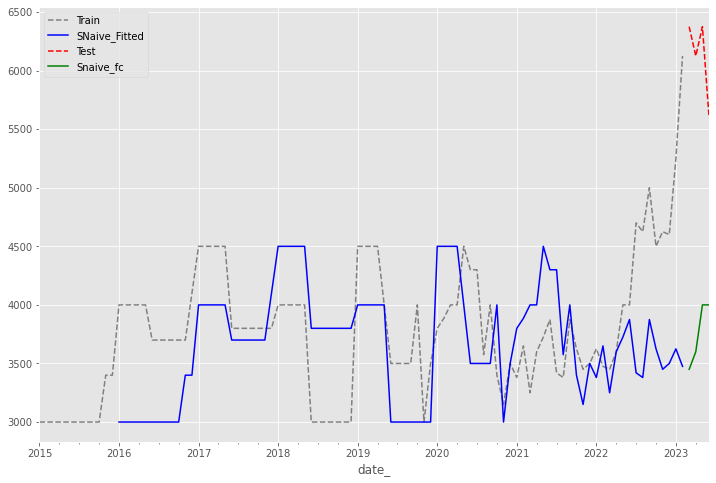

In [50]:
pd.plotting.register_matplotlib_converters()
X["Bamenda.price"].plot(figsize=(12,8), style="--", color="gray", legend=True, label="Train")#, style="--", color="gray", legend=True, label="Train")
py_snaive_fit.plot(color="b", legend=True, label="SNaive_Fitted")
predictions["Bamenda.price"].plot(style="--",color="r", legend=True, label="Test")
predictions["py_snaive"].plot(color="green", legend=True, label="Snaive_fc");

In [51]:
#Training score
accuracy(X["Bamenda.price"].iloc[-len(py_snaive_fit.dropna()):], py_snaive_fit.dropna())

,RMSE,%MAPE,%SMAPE
0,701.7,14.4,14.983893


In [52]:
#Test score
accuracy(predictions["Bamenda.price"], predictions["py_snaive"])

,RMSE,%MAPE,%SMAPE
0,2404.8,38.2,47.646618


** Mean of the residuals:  205.52

** Ljung Box Test, p-value: 0.0 (<0.05, Correlated)

** Jarque Bera Normality Test, p_value: 0.141 (>0.05, Normal)

** AD Fuller, p_value: 0.74 (>0.05, Non-stationary)


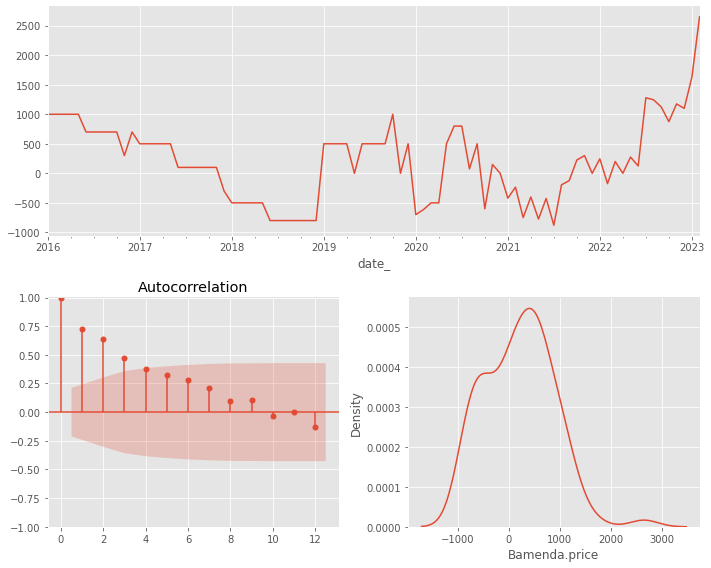

In [56]:
residcheck(py_snaive_resid.dropna(),12);

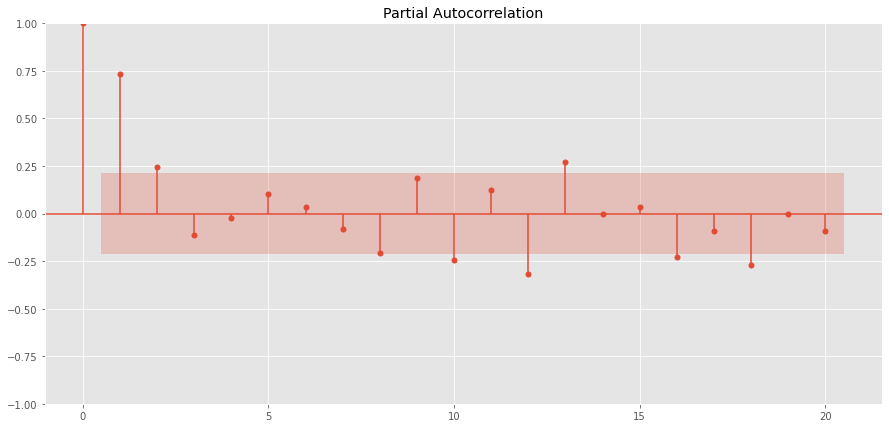

In [55]:
plot_pacf(py_snaive_resid);

#### Triple Exponential Smoothing (Holt-Winter's Method)

In [156]:
hw_cv(X["Bamenda.price"], seasonal_periods=12, initial_train_window=60, test_window=4)

add add False False    R: 692.2   ,E: 740.1
add add False True    R: 689.6   ,E: 638.9
add add True False    R: 695.4   ,E: 700.0
add add True True    R: 686.5   ,E: 665.0
add mul False False    R: 672.1   ,E: 660.3
add mul False True    R: 1127.8   ,E: 643.6
add mul True False    R: 657.5   ,E: 677.9
add mul True True    R: 2228.7   ,E: 662.2
mul add False False    R: 700.1   ,E: 789.6
mul add False True    R: 685.0   ,E: 681.5
mul add True False    R: 696.8   ,E: 776.1
mul add True True    R: 663.2   ,E: 687.4
mul mul False False    R: 684.0   ,E: 695.1
mul mul False True    R: 2287.5   ,E: 664.1
mul mul True False    R: 669.5   ,E: 680.7
mul mul True True    R: 678.2   ,E: 664.5


In [57]:
hw_model = ExponentialSmoothing(X["Bamenda.price"],
                          trend    ="mul",
                          seasonal = "add", 
                          seasonal_periods=12, 
                          damped=True,
                          use_boxcox=False).fit()

hw_fitted = hw_model.fittedvalues

hw_resid = hw_model.resid

#Adding the mean of the residuals to correct the bias.
py_hw = hw_model.forecast(len(Y['Bamenda.price'])) + np.mean(hw_resid)

predictions["py_hw"] = py_hw

#Holt-Winter Parameters
hw_model.params_formatted

,name,param,optimized
smoothing_level,alpha,0.877365,True
smoothing_trend,beta,0.000097,True
smoothing_seasonal,gamma,0.122635,True
initial_level,l.0,3059.293577,True
initial_trend,b.0,1.020503,True
damping_trend,phi,0.990065,True
initial_seasons.0,s.0,319.388776,True
initial_seasons.1,s.1,422.071284,True
initial_seasons.2,s.2,319.016471,True
initial_seasons.3,s.3,333.354184,True


** Mean of the residuals:  -24.2

** Ljung Box Test, p-value: 0.223 (>0.05, Uncorrelated)

** Jarque Bera Normality Test, p_value: 0.001 (<0.05, Not-normal)

** AD Fuller, p_value: 0.019 (<0.05, Stationary)


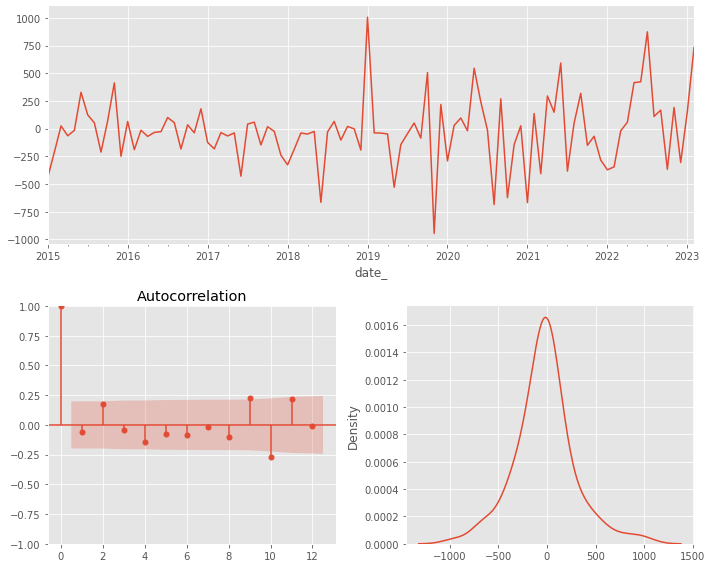

In [58]:
residcheck(hw_resid, 12);

In [63]:
predictions

,Bamenda.price,py_snaive,py_hw
date_,,,
2023-03-31,6375.0,3450.0,6043.115287
2023-04-30,6125.0,3600.0,6180.523235
2023-05-31,6375.0,4000.0,6253.618884
2023-06-30,5600.0,4000.0,5917.425270


In [64]:
accuracy(predictions["Bamenda.price"],predictions["py_hw"] )

,RMSE,%MAPE,%SMAPE
0,239.1,3.4,3.420497


In [ ]:
help(ExponentialSmoothing)

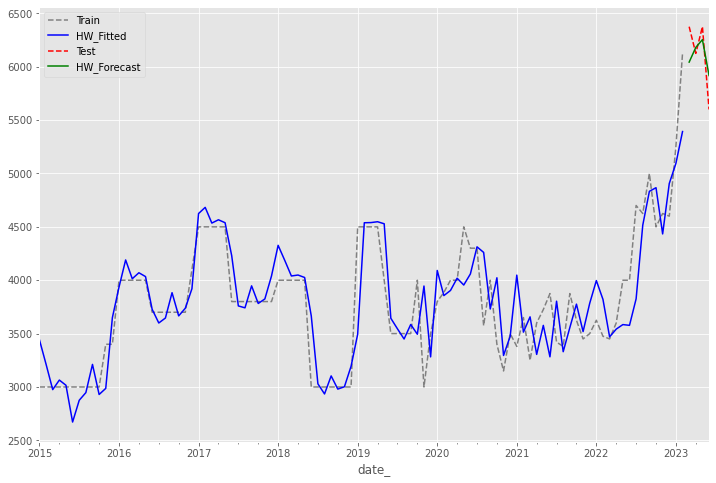

In [59]:
#Plotting

X["Bamenda.price"].plot(figsize=(12,8), style="--", color="gray", legend=True, label="Train")
hw_fitted.plot(color="b", legend=True, label="HW_Fitted")
predictions["Bamenda.price"].plot(style="--",color="r", legend=True, label="Test")
predictions["py_hw"].plot(color="green", legend=True, label="HW_Forecast");

In [60]:
predictions_=pd.DataFrame()
hw_model = ExponentialSmoothing(dfm["Bamenda.price"],
                          trend    ="mul",
                          seasonal = "add", 
                          seasonal_periods=12, 
                          damped=True,
                          use_boxcox=False).fit()

hw_fitted_ = hw_model.fittedvalues

hw_resid = hw_model.resid

#Adding the mean of the residuals to correct the bias.
py_hw_ = hw_model.forecast(6) + np.mean(hw_resid)

predictions_["py_hw"] = py_hw_

#Holt-Winter Parameters
hw_model.params_formatted

,name,param,optimized
smoothing_level,alpha,0.888929,True
smoothing_trend,beta,0.000100,True
smoothing_seasonal,gamma,0.111071,True
initial_level,l.0,3062.500000,True
initial_trend,b.0,1.022895,True
damping_trend,phi,0.990000,True
initial_seasons.0,s.0,461.892430,True
initial_seasons.1,s.1,451.475763,True
initial_seasons.2,s.2,441.059096,True
initial_seasons.3,s.3,425.434096,True


In [61]:
#Fitted values
py_snaive_fit = pysnaive(dfm["Bamenda.price"], 
                     seasonal_periods=12,
                     forecast_horizon=6)[0]

#forecast
py_snaive = pysnaive(dfm["Bamenda.price"], 
                     seasonal_periods=12,
                     forecast_horizon=6)[1]

#Residuals
py_snaive_resid = (X["Bamenda.price"] - py_snaive_fit).dropna()




#predictions["py_snaive"] = py_snaive.values 

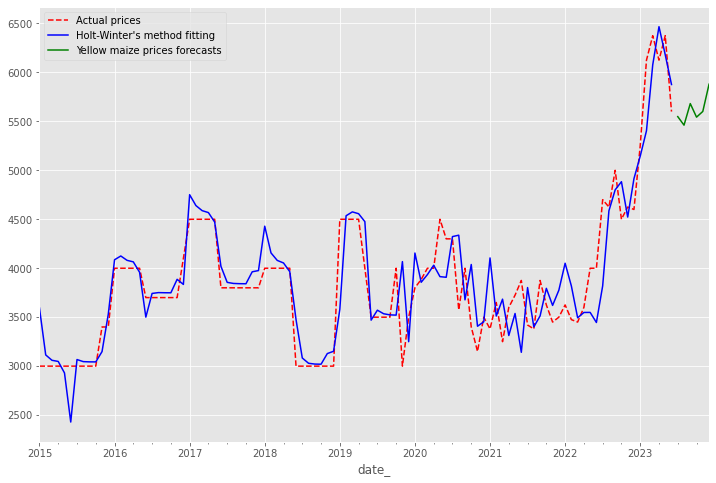

In [62]:
dfm_=pd.DataFrame()
dfm_['Actual prices']=dfm["Bamenda.price"]
dfm_['Holt-Winter method fitting']=hw_fitted_.values
dfm_['Seasonal fitting']=py_snaive_fit.values
predictions_['Seasonal naive forecast']=py_snaive.values

#Plotting

dfm["Bamenda.price"].plot(figsize=(12,8), style="--", color="red", legend=True, label="Actual prices")
hw_fitted_.plot(color="b", legend=True, label="Holt-Winter's method fitting")
#predictions["Bamenda.price"].plot(style="--",color="r", legend=True, label="Test")
#predictions["py_hw"].plot(color="yellow", legend=True, label="HW_prediction");
predictions_["py_hw"].plot(color="green", legend=True, label="Yellow maize prices forecasts");

### Advanced approach: Stats and ML forecasts

In [66]:
#!pip install statsforecast==1.6.0
#!pip install --upgrade mlforecast neuralforecast s3fs pyarrow

In [72]:
#df_
#maize_meal

In [35]:
#X__na, create lagged covariates
df_lg=df_.drop('Kano price', axis=1).shift(-7).reset_index().drop('index', axis=1).dropna()
df_lg_=df_[['Kano price']].shift(7).dropna().reset_index().dropna()
df_lgg=pd.concat([df_lg_, df_lg], axis=1).set_index('index')

In [36]:
dfmm=pd.DataFrame()
dfmm['unique_id']='g'
dfmm['ds']=df_.reset_index()['index']
dfmm['y']=df_['Kano price'].values

In [198]:
#d=pd.read_excel('Cameroun_Forecasts.xlsx')
dfmm=pd.DataFrame()
dfmm['unique_id']='g'
dfmm['ds']=dfm.reset_index()['date_']
dfmm['y']=dfm['Bamenda.price'].values

In [37]:
#lagged
dfmmg=pd.DataFrame()
dfmmg['unique_id']='g'
dfmmg['ds']=df_lgg.reset_index()['index']
dfmmg['y']=df_lgg['Kano price'].values

In [38]:
for i in range(len(dfmm)):
    dfmm.loc[i, 'unique_id']='g'

In [39]:
for i in range(len(dfmmg)):
    dfmmg.loc[i, 'unique_id']='g'

In [90]:
X__t=df_[['Close', 'CPI', 'UK price', 'Dandume_price_imp', 'Damaturu_price_imp', 'FNEX_imp', 'US_price_imp']].reset_index().drop('index', axis=1)
dfmm_=pd.concat([dfmm, X__t], axis=1)

In [41]:
X__tg=df_lgg[['Close', 'CPI', 'UK price', 'Dandume_price_imp', 'Damaturu_price_imp', 'FNEX_imp', 'US price']].reset_index().drop('index', axis=1)
X__tfg=df_[['Close', 'CPI', 'UK price', 'Dandume_price_imp', 'Damaturu_price_imp', 'FNEX_imp', 'US price']].reset_index().tail(12).rename(columns={'index':'ds'})

dfmm_g=pd.concat([dfmmg, X__tg], axis=1)

In [42]:
X__tfg['ds']=pd.date_range('2023-10-31', '2024-09-30', freq='M')
X__tfg['ds']=pd.to_datetime(X__tfg['ds'])
X__tfg=pd.concat([dfmm_g[['unique_id']].head(12), X__tfg.reset_index().drop('index', axis=1)], axis=1)
X__tfg

,unique_id,ds,Close,CPI,UK price,Dandume_price_imp,Damaturu_price_imp,FNEX_imp,US price
0,g,2023-10-31,0.002299,484.2,0.585770,0.380880,0.454250,0.001600,0.34360
1,g,2023-11-30,0.002267,490.9,0.572813,0.460564,0.451133,0.001574,0.32092
2,g,2023-12-31,0.002246,499.4,0.508846,0.420339,0.422248,0.001548,0.30225
3,g,2024-01-31,0.002206,508.7,0.522620,0.412743,0.414177,0.001522,0.30294
4,g,2024-02-29,0.002174,517.4,0.520230,0.417004,0.377709,0.001496,0.29824
5,g,2024-03-31,0.002174,527.0,0.493939,0.432328,0.380800,0.001470,0.28488
6,g,2024-04-30,0.002174,537.0,0.529036,0.478277,0.415043,0.001444,0.29118
7,g,2024-05-31,0.002173,547.5,0.476139,0.558718,0.495672,0.001418,0.26796
8,g,2024-06-30,0.001720,559.1,0.471044,0.542761,0.447534,0.001392,0.26687
9,g,2024-07-31,0.001286,575.3,0.503814,0.500892,0.480413,0.001366,0.23766


In [67]:
X__t=dfm[['exchange_rate', 'inflation_rate', 'Fundong.price', 'Kumbo.price', 'Ndop.price', 'Nkambe.price', 'Wum.price']].reset_index().drop('date_', axis=1)
dfmm_=pd.concat([dfmm, X__t], axis=1)

In [113]:
from statsforecast.models import (
    AutoARIMA,
    IMAPA,
    AutoETS,
    HoltWinters,
    CrostonClassic as Croston, 
    HistoricAverage,
    DynamicOptimizedTheta as DOT,
    SeasonalNaive, 
    RandomWalkWithDrift,
    Naive
)
from statsforecast.utils import ConformalIntervals
from statsforecast import StatsForecast

In [ ]:
help(StatsForecast)

In [39]:
#X__ttp=dfmm_[['unique_id', 'ds', 'Close', 'CPI', 'UK price', 'Dandume_price_imp', 'Damaturu_price_imp', 'FNEX_imp', 'US_price_imp']].tail(12)

#X__ttp['ds']=pd.date_range('2023-10-31','2024-09-30', freq='M')

In [ ]:
dfmm_g

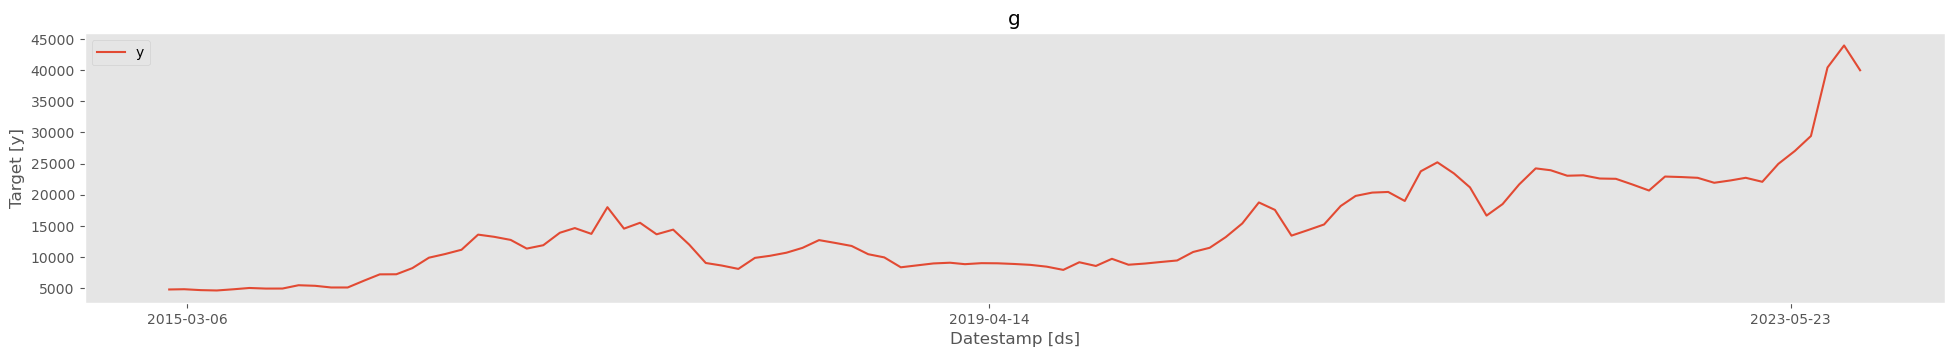

In [78]:
StatsForecast.plot(dfmm)

In [79]:
intervals=ConformalIntervals(h=12, n_windows=7)
models = [
    AutoARIMA(season_length=12, prediction_intervals=intervals),
    HoltWinters(season_length=12, prediction_intervals=intervals),
    Croston(prediction_intervals=intervals),
    SeasonalNaive(season_length=12, prediction_intervals=intervals),
    HistoricAverage(prediction_intervals=intervals),
    DOT(season_length=12, prediction_intervals=intervals),
    IMAPA(prediction_intervals=intervals),
    AutoETS(season_length=12, prediction_intervals=intervals),
    RandomWalkWithDrift(prediction_intervals=intervals),
    Naive(prediction_intervals=intervals)
]

In [ ]:
sf=StatsForecast(df=dfmm,
                 models=models,
                 n_jobs=-1,
                 freq='M')

In [148]:
levels = [95] # confidence levels of the prediction intervals 
#X_df=dfmm_.drop('y', axis=1)

#forecasts = sf.forecast(h=12, level=levels, X_df=X__tfg, prediction_intervals=intervals)
forecasts = sf.forecast(h=12, level=levels, prediction_intervals=intervals)
forecasts = forecasts.reset_index()

In [149]:
forecasts

,unique_id,ds,AutoARIMA,AutoARIMA-lo-95,AutoARIMA-hi-95,HoltWinters,HoltWinters-lo-95,HoltWinters-hi-95,CrostonClassic,CrostonClassic-lo-95,CrostonClassic-hi-95,SeasonalNaive,SeasonalNaive-lo-95,SeasonalNaive-hi-95,HistoricAverage,HistoricAverage-lo-95,HistoricAverage-hi-95,DynamicOptimizedTheta,DynamicOptimizedTheta-lo-95,DynamicOptimizedTheta-hi-95,IMAPA,IMAPA-lo-95,IMAPA-hi-95,AutoETS,AutoETS-lo-95,AutoETS-hi-95,RWD,RWD-lo-95,RWD-hi-95,Naive,Naive-lo-95,Naive-hi-95
0,g,2023-10-31,49062.406250,8381.962891,89742.851562,47025.851562,8381.962891,85669.742188,27857.882812,8381.962891,47333.804688,24417.50,8381.962891,40453.039062,14415.318359,5030.636719,23800.000000,48091.937500,8381.962891,87801.914062,36705.308594,8381.962891,65028.656250,48227.257812,8381.961914,88072.554688,48358.558594,8381.962891,88335.156250,47940.0,8381.962891,87498.039062
1,g,2023-11-30,49393.062500,9395.812500,89390.312500,45823.128906,9395.811523,82250.445312,27857.882812,9395.812500,46319.953125,23514.00,9395.812500,37632.187500,14415.318359,6536.479980,22294.156250,48292.121094,9395.812500,87188.429688,36705.308594,9395.812500,64014.804688,48514.867188,9395.813477,87633.921875,48777.117188,9395.812500,88158.421875,47940.0,9395.812500,86484.187500
2,g,2023-12-31,49490.472656,7827.999023,91152.945312,45580.171875,7828.000977,83332.343750,27857.882812,7828.000000,47887.765625,20452.50,7828.000000,33077.000000,14415.318359,7828.000000,21002.636719,48502.558594,7828.000000,89177.117188,36705.308594,7828.000000,65582.617188,48802.476562,7828.001465,89776.953125,49195.671875,7828.000000,90563.343750,47940.0,7828.000000,88052.000000
3,g,2024-01-31,49519.167969,7868.420410,91169.914062,47893.882812,7868.420898,87919.343750,27857.882812,7868.419922,47847.343750,21710.00,7868.419922,35551.578125,14415.318359,6440.574219,22390.062500,48722.679688,7868.420410,89576.937500,36705.308594,7868.419922,65542.195312,49090.085938,7868.421387,90311.757812,49614.230469,7868.420410,91360.039062,47940.0,7868.420410,88011.578125
4,g,2024-02-29,49527.621094,8726.012695,90329.226562,49354.562500,8726.013672,89983.117188,27857.882812,8726.012695,46989.753906,20935.00,8726.012695,33143.988281,14415.318359,6483.199219,22347.437500,48951.953125,8726.012695,89177.890625,36705.308594,8726.012695,64684.605469,49377.699219,8726.010742,90029.382812,50032.789062,8726.012695,91339.562500,47940.0,8726.012695,87153.984375
5,g,2024-03-31,49530.113281,9055.173828,90005.046875,49833.921875,9055.175781,90612.671875,27857.882812,9055.174805,46660.589844,23114.00,9055.174805,37172.824219,14415.318359,5589.736816,23240.900391,49189.875000,9055.174805,89324.578125,36705.308594,9055.174805,64355.441406,49665.308594,9055.174805,90275.445312,50451.347656,9055.174805,91847.523438,47940.0,9055.174805,86824.828125
6,g,2024-04-30,49530.847656,8909.248047,90152.445312,49980.843750,8909.250977,91052.437500,27857.882812,8909.250000,46806.515625,22400.00,8909.250000,35890.750000,14415.318359,6484.261719,22346.375000,49435.980469,8909.250000,89962.710938,36705.308594,8909.250000,64501.367188,49952.917969,8909.250000,90996.585938,50869.902344,8909.250000,92830.554688,47940.0,8909.250000,86970.750000
7,g,2024-05-31,49531.062500,8382.909180,90679.218750,50641.476562,8382.909180,92900.046875,27857.882812,8382.909180,47332.855469,23942.00,8382.909180,39501.089844,14415.318359,5129.786621,23700.849609,49689.828125,8382.909180,90996.750000,36705.308594,8382.909180,65027.710938,50240.527344,8382.910156,92098.148438,51288.460938,8382.909180,94194.007812,47940.0,8382.909180,87497.085938
8,g,2024-06-30,49531.125000,8399.438477,90662.812500,49937.355469,8399.437500,91475.273438,27857.882812,8399.437500,47316.328125,25906.25,8399.437500,43413.062500,14415.318359,3532.867920,25297.769531,49951.000000,8399.437500,91502.562500,36705.308594,8399.437500,65011.179688,50528.136719,8399.438477,92656.835938,51707.019531,8399.437500,95014.601562,47940.0,8399.437500,87480.562500
9,g,2024-07-31,49531.144531,8265.700195,90796.585938,

In [127]:
forecasts.to_excel('foc.xlsx', index=False)

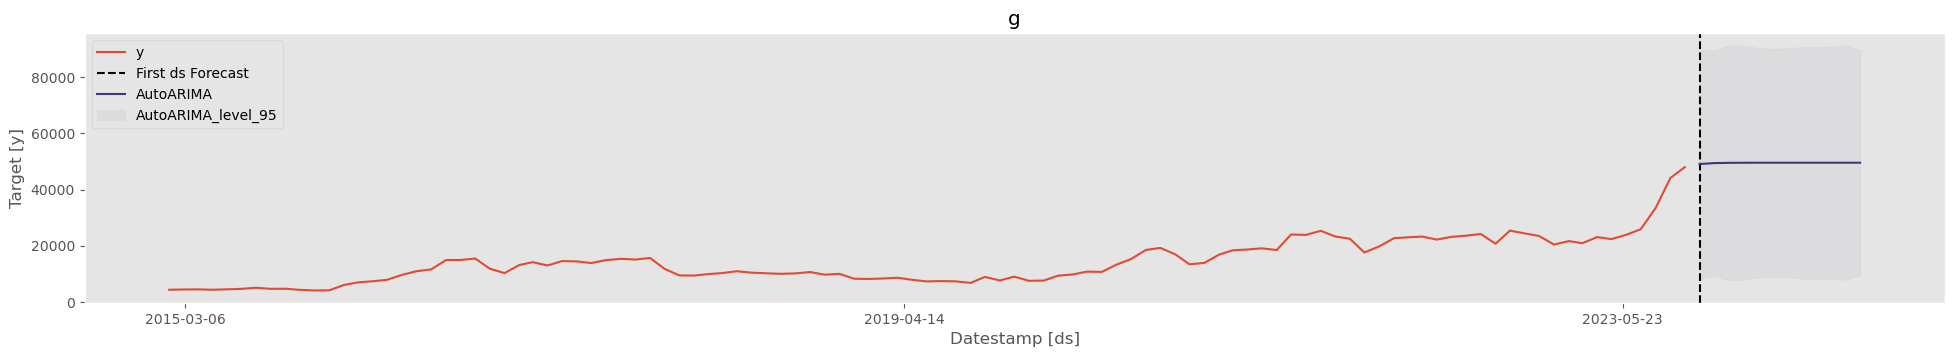

In [150]:
sf.plot(dfmm, forecasts, level=[95], models=['AutoARIMA'])

In [151]:
crossvaldation_df = sf.cross_validation(
    df=dfmm,
    h=12,
    step_size=1,
    n_windows=1,
    prediction_intervals=intervals,
    level=[95]
  )

In [ ]:
crossvaldation_df = sf.cross_validation(
    df=dfmm,
    h=52,
    step_size=1,
    n_windows=1,
    prediction_intervals=intervals,
    level=[95]
  )

In [ ]:
#pip install datasetsforecast

In [152]:
#pip install datasetsforecast
crossvaldation_df

,ds,cutoff,y,AutoARIMA,AutoARIMA-lo-95,AutoARIMA-hi-95,HoltWinters,HoltWinters-lo-95,HoltWinters-hi-95,CrostonClassic,CrostonClassic-lo-95,CrostonClassic-hi-95,SeasonalNaive,SeasonalNaive-lo-95,SeasonalNaive-hi-95,HistoricAverage,HistoricAverage-lo-95,HistoricAverage-hi-95,DynamicOptimizedTheta,DynamicOptimizedTheta-lo-95,DynamicOptimizedTheta-hi-95,IMAPA,IMAPA-lo-95,IMAPA-hi-95,AutoETS,AutoETS-lo-95,AutoETS-hi-95,RWD,RWD-lo-95,RWD-hi-95,Naive,Naive-lo-95,Naive-hi-95
unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
g,2022-10-31,2022-09-30,24417.50,25547.357422,5464.687988,45630.027344,23657.013672,5464.687012,41849.339844,21458.572266,5464.687500,37452.457031,22517.5,5464.687500,39570.312500,12706.770508,3378.327637,22035.212891,25398.324219,5464.687500,45331.960938,23387.527344,5464.687500,41310.367188,25689.464844,5464.687988,45914.242188,25645.841797,5464.687500,45826.996094,25417.5,5464.687500,45370.312500
g,2022-11-30,2022-09-30,23514.00,24045.564453,5755.750488,42335.378906,21585.921875,5755.749512,37416.093750,21458.572266,5755.750000,37161.394531,17655.0,5755.750000,29554.250000,12706.770508,5329.525879,20084.015625,25425.640625,5755.750000,45095.531250,23387.527344,5755.750000,41019.304688,25961.869141,5755.750977,46167.988281,25874.185547,5755.750000,45992.621094,25417.5,5755.750000,45079.250000
g,2022-12-31,2022-09-30,20452.50,24931.503906,5306.336914,44556.667969,21045.904297,5306.337891,36785.472656,21458.572266,5306.337402,37610.808594,19816.0,5306.337402,34325.664062,12706.770508,4659.600586,20753.939453,25453.400391,5306.337402,45600.464844,23387.527344,5306.337402,41468.718750,26234.273438,5306.338379,47162.210938,26102.527344,5306.337402,46898.718750,25417.5,5306.337402,45528.664062
g,2023-01-31,2022-09-30,21710.00,25593.253906,6627.649414,44558.855469,22458.935547,6627.649902,38290.222656,21458.572266,6627.649902,36289.496094,22717.5,6627.649902,38807.351562,12706.770508,3808.827637,21604.712891,25481.558594,6627.649902,44335.468750,23387.527344,6627.649902,40147.406250,26506.677734,6627.650879,46385.707031,26330.869141,6627.649902,46034.089844,25417.5,6627.649902,44207.351562
g,2023-02-28,2022-09-30,20935.00,25593.078125,7472.361816,43713.792969,23232.505859,7472.362793,38992.648438,21458.572266,7472.362305,35444.781250,23027.5,7472.362305,38582.636719,12706.770508,3885.916016,21527.625000,25510.078125,7472.362305,43547.792969,23387.527344,7472.362305,39302.691406,26779.083984,7472.361816,46085.804688,26559.212891,7472.362305,45646.062500,25417.5,7472.362305,43362.636719
g,2023-03-31,2022-09-30,23114.00,25763.220703,7842.512207,43683.929688,22983.873047,7842.512695,38125.230469,21458.572266,7842.512695,35074.632812,23302.0,7842.512695,38761.488281,12706.770508,3602.641113,21810.900391,25538.923828,7842.512695,43235.335938,23387.527344,7842.512695,38932.542969,27051.488281,7842.511719,46260.464844,26787.554688,7842.512695,45732.597656,25417.5,7842.512695,42992.488281
g,2023-04-30,2022-09-30,22400.00,25283.753906,7956.499023,42611.007812,22689.406250,7956.500000,37422.312500,21458.572266,7956.500000,34960.644531,22235.0,7956.500000,36513.500000,12706.770508,4188.478516,21225.062500,25568.060547,7956.500000,43179.621094,23387.527344,7956.500000,38818.554688,27323.892578,7956.499512,46691.285156,27015.896484,7956.500000,46075.292969,25417.5,7956.500000,42878.500000
g,2023-05-31,2022-09-30,23942.00,26052.626953,8129.410645,43975.843750,22751.345703,8129.410156,37373.281250,21458.572266,8129.410156,34787.734375,23200.0,8129.410156,38270.589844,12706.770508,3737.791016,21675.750000,25597.455078,8129.409668,43065.500000,23387.527344,8129.410156,38645.644531,27596.296875,8129.410156,47063.183594,27244.238281,8129.409668,46359.066406,25417.5,8129.409668,42705.589844
g,2023-06-30,2022-09-30,25906.25,25024.087891,8399.437500,41648.738281,23848.820312,8399.437500,39298.203125,21458.572266,8399.437500,34517.707031,23614.0,8399.437500,38828.562500,12706.770508,1516.041016,23897.500000,25627.078125,8399.437500,42854.718750,23387

In [153]:
from datasetsforecast.losses import mse, mae, rmse, mape, smape
#rmsse

In [154]:

def evaluate_cross_validation(df, metric):
    models = df.drop(columns=['ds', 'cutoff', 'y', 'AutoARIMA-lo-95', 'AutoARIMA-hi-95', 'HoltWinters-lo-95', 'HoltWinters-hi-95', 'CrostonClassic-lo-95', 'CrostonClassic-hi-95', 'SeasonalNaive-lo-95', 'SeasonalNaive-hi-95','HistoricAverage-lo-95', 'HistoricAverage-hi-95', 'DynamicOptimizedTheta-lo-95', 'DynamicOptimizedTheta-hi-95', 'IMAPA-lo-95', 'IMAPA-hi-95', 'AutoETS-lo-95', 'AutoETS-hi-95', 'RWD-lo-95', 'RWD-hi-95']).columns.tolist()
    evals = []
    for model in models:
        eval_ = df.groupby(['unique_id', 'cutoff']).apply(lambda x: metric(x['y'].values, x[model].values)).to_frame() # Calculate loss for every unique_id, model and cutoff.
        eval_.columns = [model]
        evals.append(eval_)
    evals = pd.concat(evals, axis=1)
    evals = evals.groupby(['unique_id']).mean(numeric_only=True) # Averages the error metrics for all cutoffs for every combination of model and unique_id
    evals['best_model'] = evals.idxmin(axis=1)
    return evals

In [155]:
evaluation_df = evaluate_cross_validation(crossvaldation_df, rmse)

evaluation_df

,AutoARIMA,HoltWinters,CrostonClassic,SeasonalNaive,HistoricAverage,DynamicOptimizedTheta,IMAPA,AutoETS,RWD,Naive,Naive-lo-95,Naive-hi-95,best_model
unique_id,,,,,,,,,,,,,
g,9006.341797,9290.236328,10809.644531,9948.672852,17376.123047,9026.583008,9831.480469,8168.650391,8299.758789,9134.918945,21846.4375,18509.537109,AutoETS


In [104]:
def get_best_model_forecast(forecasts_df, evaluation_df):
    df = forecasts_df.set_index('ds', append=True).stack().to_frame().reset_index(level=2) # Wide to long 
    df.columns = ['model', 'best_model_forecast'] 
    df = df.join(evaluation_df[['best_model']])
    df = df.query('model.str.replace("-lo-90|-hi-90", "", regex=True) == best_model').copy()
    df.loc[:, 'model'] = [model.replace(bm, 'best_model') for model, bm in zip(df['model'], df['best_model'])]
    df = df.drop(columns='best_model').set_index('model', append=True).unstack()
    df.columns = df.columns.droplevel()
    df = df.reset_index(level=1)
    return df

In [ ]:
prod_forecasts_df = get_best_model_forecast(forecasts_df, evaluation_df)

prod_forecasts_df.head()

In [ ]:
sf.plot(dfmm, prod_forecasts_df, level=[95])

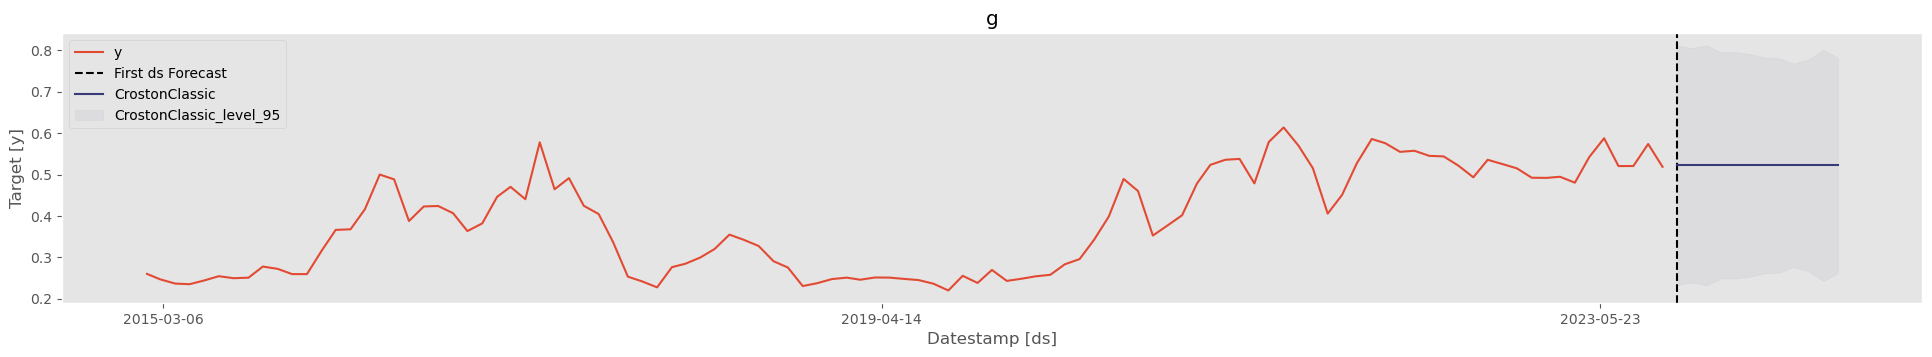

In [105]:
sf.plot(dfmm, forecasts, level=[95], models=['CrostonClassic'])

### ML models

In [42]:
#!pip install --upgrade mlforecast
#import mlforecast
#print(mlforecast.__version__)

In [43]:
from mlforecast import MLForecast
from mlforecast.target_transforms import Differences
from mlforecast.utils import PredictionIntervals
from window_ops.expanding import expanding_mean
from numba import njit
from window_ops.expanding import expanding_mean
from window_ops.rolling import rolling_mean
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from utilsforecast.plotting import plot_series
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from mlforecast.feature_engineering import transform_exog

In [44]:
import lightgbm as lgb

In [64]:
#l=pd.date_range(start='09/04/2021', end='13/09/2023')
#df__=pd.DataFrame(index=l)
#df__.index=l
#df__=df__.reset_index().rename(columns={'index':'ds'})
#t=df['fatalities']
#t[df.index[0]]
#for i in range(len(df__)):
    #if df__.loc[i, 'ds'] in df.index:
     #   df__.loc[i, 'y']=t[df__.loc[i, 'ds']]
    #else:
     #   df__.loc[i, 'y']=0

#for i in range(len(df__)):
 #   df__.loc[i, 'unique_id']='g'
#dfmm=df__.copy()
X__t=pd.DataFrame()
X__t['unique_id']='g'
X__t=pd.concat([X__t, df_[['Close', 'CPI', 'UK price', 'Dandume_price_imp', 'Damaturu_price_imp', 'FNEX_imp', 'US price']].reset_index().rename(columns={'index':'ds'})])
for i in range(len(X__t)):
    X__t.loc[i, 'unique_id']='g'

In [68]:
X__t_=transform_exog(X__t, lags=[6])
X__t_=X__t_[['unique_id', 'ds', 'Close_lag6', 'CPI_lag6', 'UK price_lag6', 'Dandume_price_imp_lag6', 'Damaturu_price_imp_lag6', 'FNEX_imp_lag6', 'US price_lag6']].rename(columns={'Close_lag6':'Close', 'CPI_lag6':'CPI', 'UK price_lag6':'UK price', 'Dandume_price_imp_lag6':'Dandume_price_imp', 'Damaturu_price_imp_lag6':'Damaturu_price_imp', 'FNEX_imp_lag6':'FNEX_imp', 'US price_lag6':'US price'})
ftr=X__t[['unique_id', 'ds', 'Close', 'CPI', 'UK price', 'Dandume_price_imp', 'Damaturu_price_imp', 'FNEX_imp', 'US price']].tail(6)
ftr['ds']=pd.to_datetime(pd.date_range('2023-10-31', '2024-03-31', freq='M'))
X__t_=pd.concat([X__t_, ftr])
dfmm_=dfmm.merge(X__t_, on=['unique_id', 'ds'])
dfmm_=dfmm_.dropna()

In [94]:
mlf = MLForecast(
    models = [
    #KNeighborsRegressor(),
    Lasso(),
    LinearRegression(),
    MLPRegressor(),
    Ridge(),
    lgb.LGBMRegressor(),
    XGBRegressor(), 
    #LinearRegression(),
    RandomForestRegressor(),
    CatBoostRegressor()
    ],  # we're not interested in modeling yet
    freq='M',  # our series have integer timestamps, so we'll just add 1 in every timestep
    lags=[1, 2, 3],
    #lag_transforms = {
        #1:  [expanding_mean],  
         # Apply expanding mean transformation to the lag of 1 day
   # },
    target_transforms=[Differences([1])]
)

In [95]:
interval=PredictionIntervals(n_windows=7, h=12)

In [ ]:
help(MLForecast) 

In [ ]:
cv_mlf_df = mlf.cross_validation(
    df=dfmm_, 
    h=9, 
    n_windows=1, 
    step_size=1, 
    refit=True,
    prediction_intervals=interval,
    level=[95]
    #fitted=True
)

In [102]:
mlf.fit(df=dfmm_,
        fitted=True,
        #max_horizon=12,
        static_features=[], 
        prediction_intervals=interval)

Learning rate set to 0.020078
0:	learn: 0.0470968	total: 1.35ms	remaining: 1.34s
1:	learn: 0.0468369	total: 2.4ms	remaining: 1.2s
2:	learn: 0.0466300	total: 3.75ms	remaining: 1.25s
3:	learn: 0.0464014	total: 5.32ms	remaining: 1.32s
4:	learn: 0.0461438	total: 6.86ms	remaining: 1.36s
5:	learn: 0.0458878	total: 8.2ms	remaining: 1.36s
6:	learn: 0.0456672	total: 9.54ms	remaining: 1.35s
7:	learn: 0.0454553	total: 10.9ms	remaining: 1.35s
8:	learn: 0.0452112	total: 12.2ms	remaining: 1.35s
9:	learn: 0.0449605	total: 13.2ms	remaining: 1.31s
10:	learn: 0.0447626	total: 19.6ms	remaining: 1.77s
11:	learn: 0.0445175	total: 21.1ms	remaining: 1.74s
12:	learn: 0.0442998	total: 22.7ms	remaining: 1.73s
13:	learn: 0.0441120	total: 23.8ms	remaining: 1.68s
14:	learn: 0.0438683	total: 25.1ms	remaining: 1.65s
15:	learn: 0.0437184	total: 25.6ms	remaining: 1.57s
16:	learn: 0.0434916	total: 26.6ms	remaining: 1.54s
17:	learn: 0.0433712	total: 27.3ms	remaining: 1.49s
18:	learn: 0.0431572	total: 28ms	remaining: 1.4

MLForecast(models=[Lasso, LinearRegression, MLPRegressor, Ridge, LGBMRegressor, XGBRegressor, RandomForestRegressor, CatBoostRegressor], freq=<MonthEnd>, lag_features=['lag1', 'lag2', 'lag3'], date_features=[], num_threads=1)

In [103]:
fit_ml=mlf.forecast_fitted_values()

In [109]:
def evaluate_cross_validation(df, metric):
    models = df.drop(columns=['unique_id', 'ds', 'y']).columns.tolist()
    evals = []
    for model in models:
        eval_ = df.groupby(['unique_id']).apply(lambda x: metric(x['y'].values, x[model].values)).to_frame() # Calculate loss for every unique_id, model and cutoff.
        eval_.columns = [model]
        evals.append(eval_)
    evals = pd.concat(evals, axis=1)
    #evals = evals.groupby(['unique_id']).mean(numeric_only=True) # Averages the error metrics for all cutoffs for every combination of model and unique_id
    evals['best_model'] = evals.idxmin(axis=1)
    return evals

In [120]:
def evaluate_cross_validation(df, metric):
    models = df.drop(columns=['unique_id', 'ds', 'cutoff', 'y', 'Lasso-lo-95', 'Lasso-hi-95', 'LinearRegression-lo-95', 'LinearRegression-hi-95', 'MLPRegressor-lo-95', 'MLPRegressor-hi-95', 'Ridge-lo-95', 'Ridge-hi-95', 'LGBMRegressor-lo-95', 'LGBMRegressor-hi-95', 'XGBRegressor-lo-95', 'XGBRegressor-hi-95', 'RandomForestRegressor-lo-95', 'RandomForestRegressor-hi-95', 'CatBoostRegressor-lo-95','CatBoostRegressor-hi-95']).columns.tolist()
    evals = []
    for model in models:
        eval_ = df.groupby(['unique_id', 'cutoff']).apply(lambda x: metric(x['y'].values, x[model].values)).to_frame() # Calculate loss for every unique_id, model and cutoff.
        eval_.columns = [model]
        evals.append(eval_)
    evals = pd.concat(evals, axis=1)
    evals = evals.groupby(['unique_id']).mean(numeric_only=True) # Averages the error metrics for all cutoffs for every combination of model and unique_id
    evals['best_model'] = evals.idxmin(axis=1)
    return evals

In [121]:
evaluate_cross_validation(cv_mlf_df, rmse)

,Lasso,LinearRegression,MLPRegressor,Ridge,LGBMRegressor,XGBRegressor,RandomForestRegressor,CatBoostRegressor,best_model
unique_id,,,,,,,,,
g,0.037689,0.07124,122.963573,2.544271,0.031815,0.028663,0.054251,0.039921,XGBRegressor


In [65]:
#fit_ml

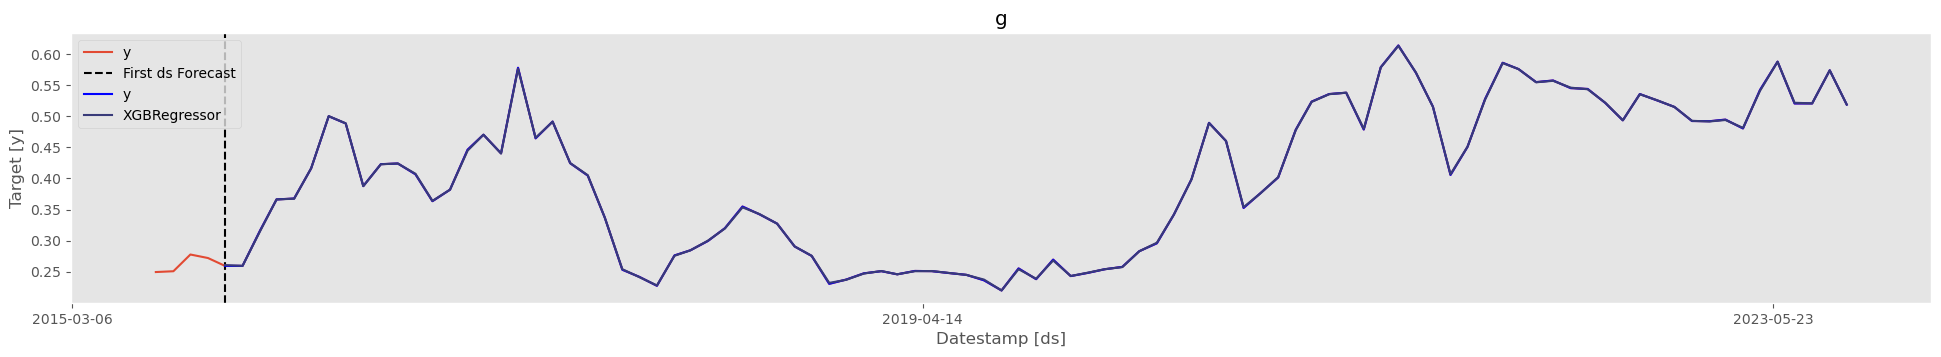

In [115]:
StatsForecast.plot(dfmm_, fit_ml, models=['XGBRegressor'])

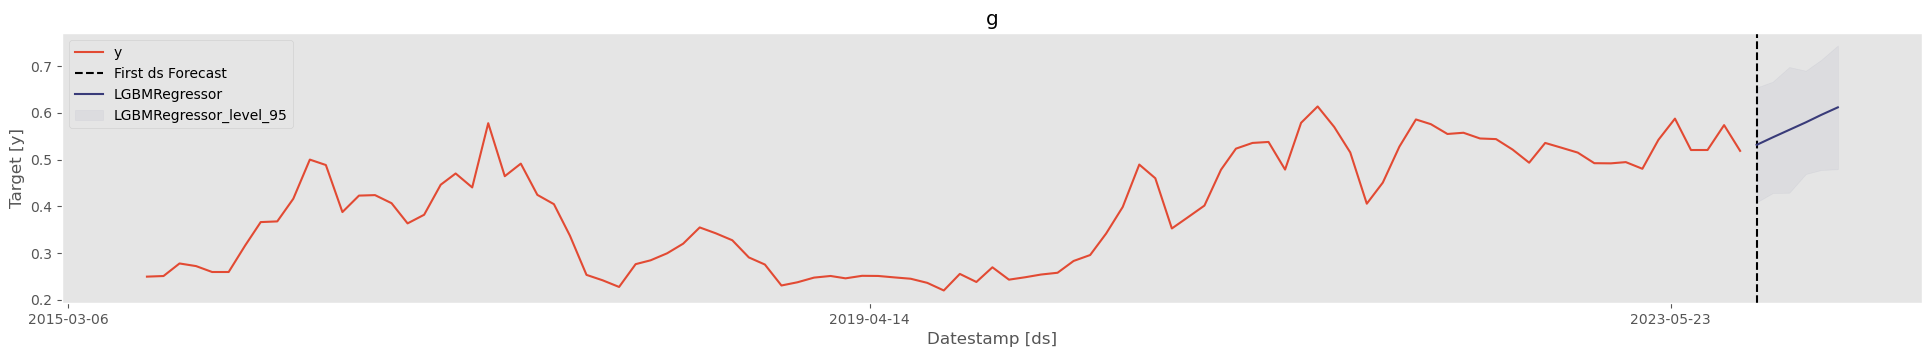

In [125]:
StatsForecast.plot(dfmm_, fcst_mlf_df, models=['LGBMRegressor'])

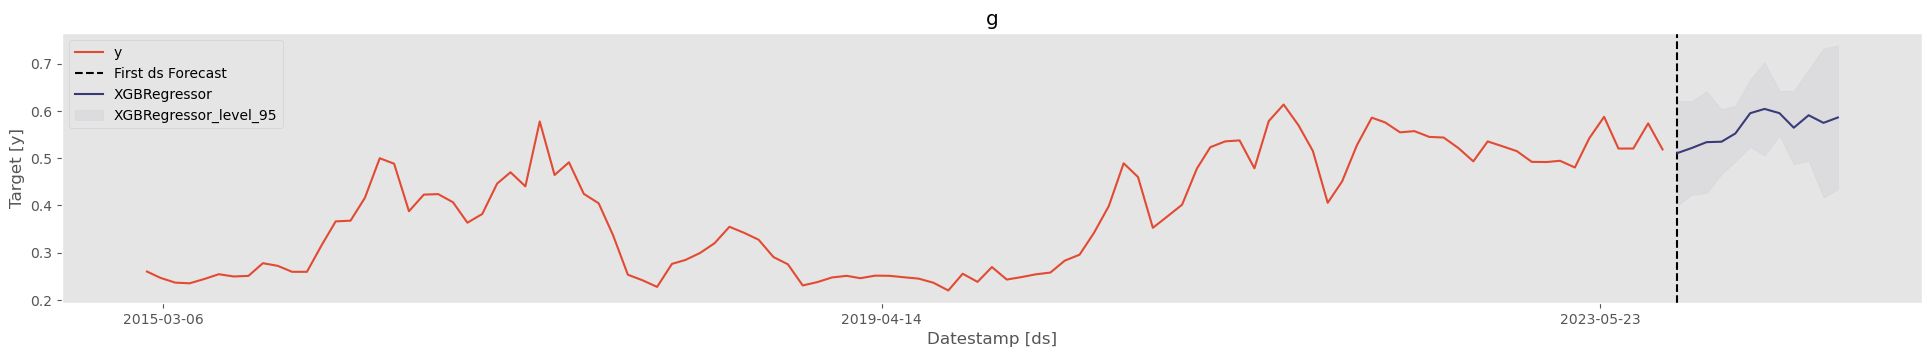

In [52]:
StatsForecast.plot(dfmm, fcst_mlf_df, models=['XGBRegressor'])

In [91]:
fit_ml.to_excel('fit_mlmodels_local.xlsx', index=False)

In [116]:
fcst_mlf_df = mlf.predict(6, X_df=X__t_.dropna(), level=[95])
#fcst_mlf_df = mlf.predict(12, level=[95])

In [118]:
fcst_mlf_df

,unique_id,ds,Lasso,LinearRegression,MLPRegressor,Ridge,LGBMRegressor,XGBRegressor,RandomForestRegressor,CatBoostRegressor,Lasso-lo-95,Lasso-hi-95,LinearRegression-lo-95,LinearRegression-hi-95,MLPRegressor-lo-95,MLPRegressor-hi-95,Ridge-lo-95,Ridge-hi-95,LGBMRegressor-lo-95,LGBMRegressor-hi-95,XGBRegressor-lo-95,XGBRegressor-hi-95,RandomForestRegressor-lo-95,RandomForestRegressor-hi-95,CatBoostRegressor-lo-95,CatBoostRegressor-hi-95
0,g,2023-10-31,0.521229,0.512921,10.559950,0.239129,0.531438,0.510475,0.504189,0.503938,0.398493,0.643964,-60.109855,61.135697,-1.218626e+06,1.218647e+06,-1612.626624,1613.104883,0.408702,0.654173,0.368316,0.652634,0.376259,0.632120,0.383600,0.624277
1,g,2023-11-30,0.523823,0.505249,22.601366,-0.088544,0.547491,0.546555,0.496377,0.511063,0.404764,0.642882,-409.613414,410.623912,-5.443346e+05,5.443798e+05,-3113.965728,3113.788640,0.428432,0.666551,0.379348,0.713763,0.372481,0.620274,0.406615,0.615511
2,g,2023-12-31,0.526417,0.501943,33.250629,-0.319248,0.563545,0.521796,0.487158,0.489194,0.392033,0.660801,-1674.706791,1675.710677,-1.074092e+06,1.074159e+06,-2864.959101,2864.320604,0.429161,0.697929,0.314897,0.728694,0.344988,0.629329,0.369957,0.608431
3,g,2024-01-31,0.529011,0.514747,42.031327,-0.309609,0.579599,0.477388,0.472182,0.464074,0.418558,0.639464,-5590.562950,5591.592444,-1.278514e+06,1.278598e+06,-2849.864321,2849.245103,0.469146,0.690052,0.218562,0.736213,0.328822,0.615543,0.364628,0.563519
4,g,2024-02-29,0.531605,0.512988,50.871187,-0.303189,0.595653,0.533520,0.469224,0.466749,0.413752,0.649458,-17491.106757,17492.132733,-1.944162e+06,1.944264e+06,-2854.673606,2854.067228,0.477800,0.713506,0.215659,0.851381,0.307113,0.631335,0.358402,0.575096
5,g,2024-03-31,0.534199,0.541500,60.480277,-0.298519,0.611707,0.499478,0.454649,0.447364,0.401882,0.666517,-54637.915267,54638.998266,-2.330006e+06,2.330127e+06,-2854.285155,2853.688117,0.479389,0.744025,0.106343,0.892612,0.264378,0.644920,0.318787,0.575940


In [93]:
fcst_mlf_df

,unique_id,ds,Lasso,LinearRegression,MLPRegressor,Ridge,LGBMRegressor,XGBRegressor,LinearRegression2,RandomForestRegressor,CatBoostRegressor,Lasso-lo-95,Lasso-hi-95,LinearRegression-lo-95,LinearRegression-hi-95,MLPRegressor-lo-95,MLPRegressor-hi-95,Ridge-lo-95,Ridge-hi-95,LGBMRegressor-lo-95,LGBMRegressor-hi-95,XGBRegressor-lo-95,XGBRegressor-hi-95,LinearRegression2-lo-95,LinearRegression2-hi-95,RandomForestRegressor-lo-95,RandomForestRegressor-hi-95,CatBoostRegressor-lo-95,CatBoostRegressor-hi-95
0,g,2023-10-31,37186.868943,40282.744813,40342.422882,40302.439730,40967.081285,41198.867188,40535.285335,40620.0925,40811.565639,30966.200172,43407.537714,35260.772098,45304.717528,16267.697443,64417.148321,15183.271666,65421.607793,36062.948197,45871.214373,36937.015234,45460.719141,36264.346442,44806.224227,35928.74000,45311.44500,36018.848891,45604.282386
1,g,2023-11-30,36675.649766,40601.521257,40745.458802,40520.536103,42184.942290,42022.480469,41270.993187,41624.8550,41679.667236,29440.923750,43910.375782,34261.310381,46941.732134,9912.409391,71578.508213,-1788.474193,82829.546399,37842.713614,46527.170967,38988.889575,45056.071362,36923.858178,45618.128195,37898.44750,45351.26250,37485.935313,45873.399158
2,g,2023-12-31,37848.232009,40926.582025,41148.165417,40744.419624,43122.575887,42790.722656,41698.296086,42463.7525,42572.169014,31901.911055,43794.552964,35058.986346,46794.177704,6731.680560,75564.650275,5960.224786,75528.614462,38210.814123,48034.337652,39564.940356,46016.504956,36270.757831,47125.834340,36880.62250,48046.88250,36331.534404,48812.803624
3,g,2024-01-31,38976.837217,41253.461823,41583.346305,41054.826734,43700.297304,44085.398438,41964.704960,43193.4875,43629.730551,36173.544019,41780.130414,34403.084774,48103.838872,-14665.298151,97831.990761,-1970.409748,84080.063215,39958.627452,47441.967157,41392.811963,46777.984912,38463.534692,45465.875228,39025.86000,47361.11500,38782.099556,48477.361545
4,g,2024-02-29,39543.672084,41579.111637,42074.301468,41403.781369,44405.425193,44959.281250,42195.410262,44219.1825,44701.713815,34205.227533,44882.116634,33281.169550,49877.053725,-20881.884407,105030.487343,-23391.863920,106199.426657,40304.634752,48506.215634,42384.142969,47534.419531,37882.521344,46508.299180,39952.53500,48485.83000,39526.313718,49877.113913
5,g,2024-03-31,39699.565539,41903.231679,42576.681963,41752.083074,45342.566502,45553.683594,42486.437911,44793.7875,45759.544015,33740.337807,45658.793272,36008.362106,47798.101253,-20503.809302,105657.173229,-15137.971178,98642.137325,41125.455472,49559.677531,43088.207812,48019.159375,37037.547993,47935.327829,39133.33000,50454.24500,39109.465338,52409.622691
6,g,2024-04-30,39824.554515,42226.813807,43101.398750,42081.691132,46244.246270,47183.117188,42822.085314,45412.8125,47100.039868,35935.751728,43713.357302,36771.296333,47682.331282,-44899.193837,131101.991337,-15349.765982,99513.148246,41888.595902,50599.896637,43585.443115,50780.791260,37977.251908,47666.918721,39863.25625,50962.36875,40505.185447,53694.894289
7,g,2024-05-31,40078.504931,42550.633070,43691.437879,42400.541528,47055.707372,48452.492188,43168.088305,46773.5275,48339.388207,31916.198102,48240.811760,33928.609090,51172.657050,-58234.152913,145617.028671,-42910.837536,127711.920592,42525.075166,51586.339578,45318.702197,51586.282178,38108.542698,48227.633913,41272.16000,52274.89500,41600.903432,55077.872981
8,g,2024-06-30,40434.932788,42874.819859,44314.320184,42718.882657,47712.621272,47906.187500,43501.783206,47208.1875,49590.113103,33191.349937,47678.515638,32606.511717,53143.128001,-53655.996282,142284.636651,-34303.180535,119740.945849,42435.998478,52989.244067,41683.520703,54128.854297,36210.890863,50792.675548,39683.34000,54733.03500,40747.279749,58432.946456
9,g,2024-07-31,40807.315611,43199.158803,44956.272922,43041.350534,48369.535173,47678.097656,43824.057295,47444.5100,50807.438837,31350.537069,50264.094153,33353.809495,53044.508111,-75011.667505,164924.213348,-17471.619850

In [171]:
dfmm

,unique_id,ds,y
0,g,2015-01-31,4410.00
1,g,2015-02-28,4500.00
2,g,2015-03-31,4560.00
3,g,2015-04-30,4410.00
4,g,2015-05-31,4570.00
...,...,...,...
100,g,2023-05-31,23942.00
101,g,2023-06-30,25906.25
102,g,2023-07-31,33417.50
103,g,2023-08-31,44130.00


In [55]:
fcst_mlf_df.to_excel('forecasts_mlmodels_local.xlsx', index=False)

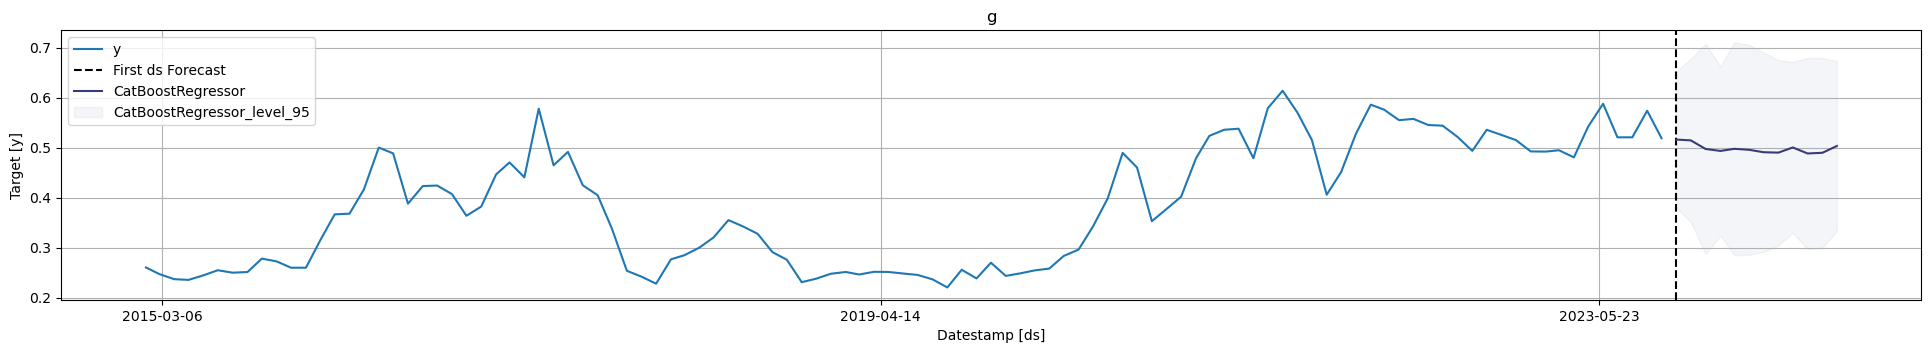

In [106]:
sf.plot(dfmm, fcst_mlf_df, models=['CatBoostRegressor'])

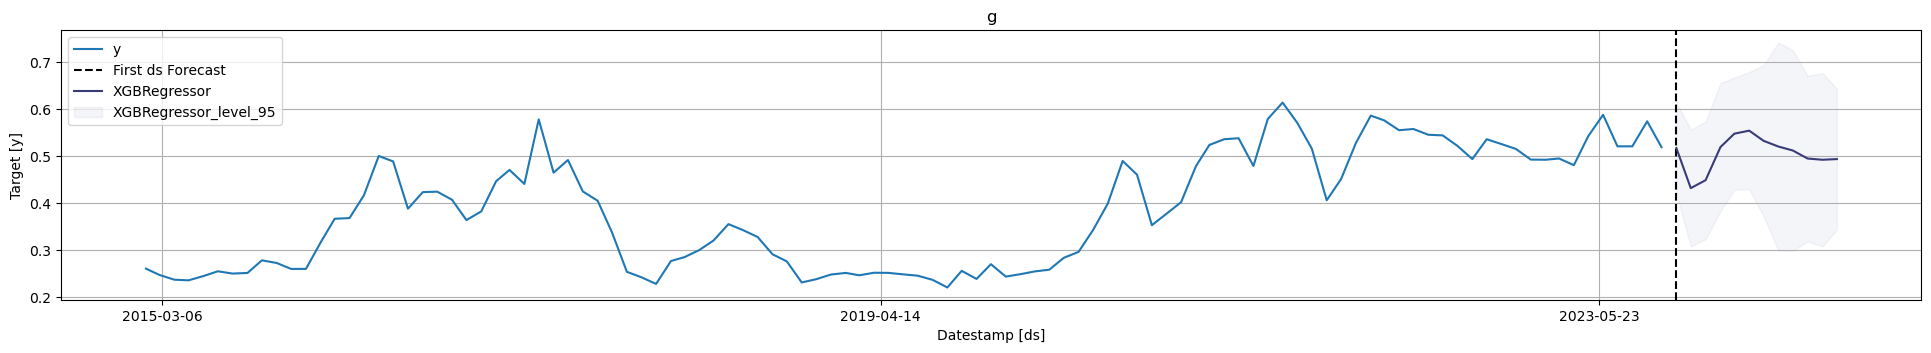

In [107]:
sf.plot(dfmm, fcst_mlf_df, models=['XGBRegressor'])

In [ ]:
help(MLForecast)

In [ ]:
cv_result = fcst.cross_validation(
    df,
    n_windows=6,  # number of models to train/splits to perform
    window_size=12,  # length of the validation set in each window
)
cv_result

In [ ]:
def plot_cv(df, df_cv, uid, fname, last_n=24 * 14):
    cutoffs = df_cv.query('unique_id == @uid')['cutoff'].unique()
    fig, ax = plt.subplots(nrows=len(cutoffs), ncols=1, figsize=(14, 6), gridspec_kw=dict(hspace=0.8))
    for cutoff, axi in zip(cutoffs, ax.flat):
        df.query('unique_id == @uid').tail(last_n).set_index('ds').plot(ax=axi, title=uid, y='y')
        df_cv.query('unique_id == @uid & cutoff == @cutoff').set_index('ds').plot(ax=axi, title=uid, y='LGBMRegressor')
    fig.savefig(fname, bbox_inches='tight')
    plt.close()


In [ ]:
fcst.fit(
    train,
    prediction_intervals=PredictionIntervals(n_windows=6, h=12),
);

In [ ]:
forecasts = fcst.predict(12, level=[95])
forecasts

In [ ]:
fig = plot_series(
    train, 
    test, 
    plot_random=False, 
    models=['KNeighborsRegressor'], 
    level=levels, 
    max_insample_length=48

In [94]:
h=predictions_.reset_index().rename(columns={'index':'date_'})
t=dfm_.reset_index()

In [98]:
#dfinal=pd.DataFrame()
#dfinal['Date']=pd.concat([t[['date_']], h[['date_']]])

,Date,date_,Actual prices,Holt-Winter method fitting,Seasonal fitting
0,2015-01-31,2015-01-31,3000.0,3594.509383,NaN
1,2015-02-28,2015-02-28,3000.0,3114.591591,NaN
2,2015-03-31,2015-03-31,3000.0,3059.718743,NaN
3,2015-04-30,2015-04-30,3000.0,3047.925834,NaN
4,2015-05-31,2015-05-31,3000.0,2930.725730,NaN
...,...,...,...,...,...
1,2023-08-31,2015-02-28,3000.0,3114.591591,NaN
2,2023-09-30,2015-03-31,3000.0,3059.718743,NaN
3,2023-10-31,2015-04-30,3000.0,3047.925834,NaN
4,2023-11-30,2015-05-31,3000.0,2930.725730,NaN


In [87]:
dfm_.reset_index().to_excel('Actual__fit.xlsx', index=False)
predictions_.reset_index().to_excel('forecasts.xlsx', index=False)

In [79]:
d.to_excel('Cameroun_Forecasts.xlsx', index=False)

In [76]:
X.index.freq='M'

In [77]:
#https://www.statsmodels.org/stable/statespace.html#
ets_LAdA=sm.tsa.statespace.ExponentialSmoothing(X[['Bamenda.price']],
                                           trend=True, 
                                           initialization_method= 'concentrated', 
                                           seasonal=12, 
                                           damped_trend=True).fit()

fc_LAdA = ets_LAdA.forecast(4) #inverting the Log

predictions["LAdA"]=fc_LAdA

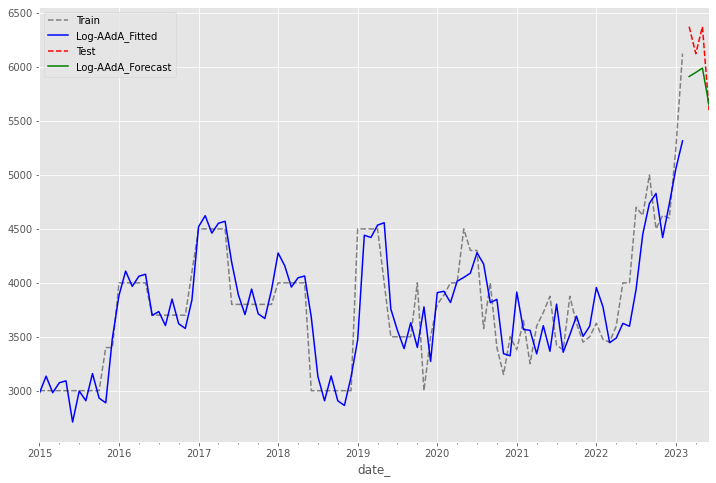

In [80]:
#Plotting

X["Bamenda.price"].plot(figsize=(12,8), style="--", color="gray", legend=True, label="Train")
ets_LAdA.fittedvalues.plot(color="b", legend=True, label="Log-AAdA_Fitted")
predictions["Bamenda.price"].plot(style="--",color="r", legend=True, label="Test")
predictions["LAdA"].plot(color="green", legend=True, label="Log-AAdA_Forecast");

** Mean of the residuals:  10.7

** Ljung Box Test, p-value: 0.269 (>0.05, Uncorrelated)

** Jarque Bera Normality Test, p_value: 0.0 (<0.05, Not-normal)

** AD Fuller, p_value: 0.051 (>0.05, Non-stationary)


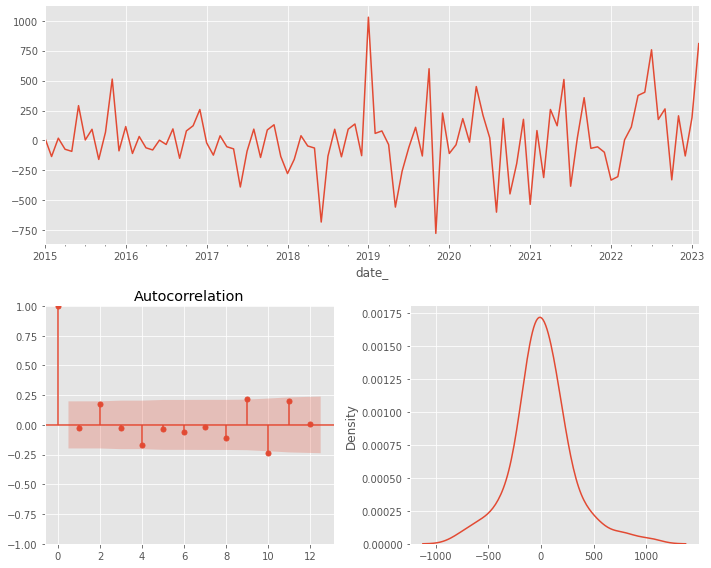

In [81]:
residcheck(ets_LAdA.resid,12);

In [82]:
accuracy(predictions["Bamenda.price"],predictions["LAdA"])

,RMSE,%MAPE,%SMAPE
0,313.6,4.2,4.366376


In [83]:
tscv = expanding_window(initial = 60, horizon = 4,period = 1)

tscv_ = TimeSeriesSplit(gap=1, max_train_size=60, test_size=4)

params = {
    'max_depth':(5,6,7,-1),
    'reg_lambda':(1e-3, 1e-2, 1e-1, 1, 10),
    'reg_alpha':(1e-3, 1e-2, 1e-1, 1, 10)
}

lgb_reg = lgb.LGBMRegressor(random_state=9, n_jobs=-1)

In [84]:
from scipy.stats import norm
def back(x, lam, sig):

    if lam==0:
        return np.exp(x)*(1 + 0.5 * sig**2)
    else:
        res=np.power(lam*x + 1., 1/lam)
        res*=(1 + 0.5 * sig**2 * (1 - lam) / (lam*x + 1.)**2)
    return res

In [85]:
X__na['Bamenda.price_price_box_train'], lam = boxcox(X__na['Bamenda.price'])

In [89]:
#from sklearn.compose import TransformedTargetRegressor

In [90]:
%%time
gridcv = GridSearchCV(estimator=lgb_reg, param_grid=params,\
                      scoring="neg_mean_absolute_error", n_jobs=-1, cv=tscv_)
gridcv = gridcv.fit(X__na.drop(['Bamenda.price_price_box', 'Bamenda.price', 'Bamenda.price_price_box_train'], axis=1), X__na[['Bamenda.price_price_box_train']])

CPU times: total: 1.02 s
Wall time: 31.7 s


In [91]:
best_params = gridcv.best_params_
best_score = round(gridcv.best_score_,4)
print(best_score)

-0.0003


In [92]:
print(best_params)

{'max_depth': 5, 'reg_alpha': 0.001, 'reg_lambda': 1}


In [93]:
%%time
lgb_reg = lgb.LGBMRegressor(random_state=9, n_jobs=-1,\
                            **best_params)
lgb_reg = lgb_reg.fit(X__na.drop(['Bamenda.price_price_box', 'Bamenda.price', 'Bamenda.price_price_box_train'], axis=1), X__na[['Bamenda.price_price_box_train']])

y_pred = lgb_reg.predict(Y__na.drop('Bamenda.price', axis=1))

CPU times: total: 31.2 ms
Wall time: 66.6 ms


In [94]:
y_pred_t = lgb_reg.predict(X__na.drop(['Bamenda.price_price_box', 'Bamenda.price', 'Bamenda.price_price_box_train'], axis=1))

In [95]:
#y_pred_b=inv_boxcox(y_pred, boxcox(maize_meal['Bamenda.price'])[1])
sig=np.sum((X__na['Bamenda.price_price_box_train'].values - y_pred_t)**2)
sig=np.sqrt(sig / (len(X__na)-1))

In [104]:
X__nan=pd.DataFrame()

In [105]:
predictions["XGBOOST"]=y_pred
#predictions["XGBOOST"]=predictions['XGBOOST'].apply(lambda x: back(x, lam, sig))
predictions["XGBOOST"]=inv_boxcox(predictions["XGBOOST"], lam).values
X__nan['pred_box']=y_pred_t
#X__nan['pred_box']=X__nan['pred_box'].apply(lambda x: back(x, lam, sig))
X__nan['pred_box']=inv_boxcox(X__nan['pred_box'], lam).values
X__nan=X__nan.set_index(X__na.reset_index()['date_'])


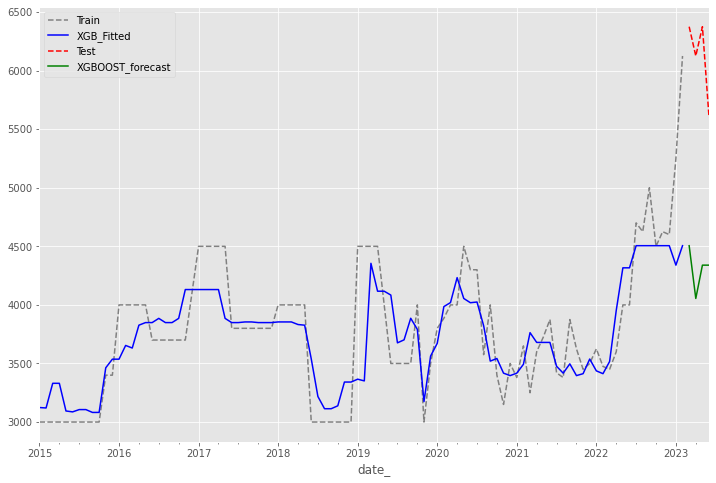

In [106]:
#Plotting
X__na["Bamenda.price"].plot(figsize=(12,8), style="--", color="gray", legend=True, label="Train")
X__nan['pred_box'].plot(color="b", legend=True, label="XGB_Fitted")
predictions["Bamenda.price"].plot(style="--",color="r", legend=True, label="Test")
predictions["XGBOOST"].plot(color="green", legend=True, label="XGBOOST_forecast");

In [107]:
accuracy(predictions["Bamenda.price"],predictions["XGBOOST"])

,RMSE,%MAPE,%SMAPE
0,1838.1,29.4,34.600894


In [108]:
X_=X[['Bamenda.price']]

In [ ]:
help(sm.tsa.SARIMAX)

In [109]:
rmse = []
for train_index, test_index in tscv.split(X__na):
    cv_train, cv_test = X__na[['Bamenda.price_price_box_train']].iloc[train_index], X__na[['Bamenda.price_price_box_train']].iloc[test_index]
    
    arma = sm.tsa.SARIMAX(cv_train, order=(1, 0, 1), seasonal_order=(0, 0, 0, 12), enforce_stationarity=False).fit(maxiter=10000, method='bfgs', disp=True)
    
    predictionss = arma.predict(cv_test.index.values[0], cv_test.index.values[-1], axis=1)
    true_values = cv_test.values
    rmse.append(math.sqrt(mean_squared_error(true_values, predictionss)))
    
print("RMSE: {}".format(np.mean(rmse)))

         Current function value: -6.783554
         Iterations: 6
         Function evaluations: 61
         Gradient evaluations: 49
         Current function value: -6.787323
         Iterations: 6
         Function evaluations: 67
         Gradient evaluations: 55
         Current function value: -6.798530
         Iterations: 5
         Function evaluations: 68
         Gradient evaluations: 56
         Current function value: -6.809532
         Iterations: 5
         Function evaluations: 59
         Gradient evaluations: 47
         Current function value: -6.820892
         Iterations: 5
         Function evaluations: 62
         Gradient evaluations: 50
         Current function value: -6.822747
         Iterations: 7
         Function evaluations: 66
         Gradient evaluations: 56
         Current function value: -6.832459
         Iterations: 7
         Function evaluations: 66
         Gradient evaluations: 54
         Current function value: -6.843089
         Iterations

In [133]:
#start = len(X_)
#end = len(X_) +len(Y) -1

In [110]:
sig=np.sum((X__na['Bamenda.price_price_box_train'].values - arma.predict(X__na.index.values[0], X__na.index.values[-1]).values)**2)
sig=np.sqrt(sig / (len(X__na)-1))
corr_fac=X__na[['Bamenda.price']].values.sum()/arma.predict(X__n.index.values[0], X__n.index.values[-1]).values.sum()

In [111]:
#saar=arma.predict(start, end)

sarr=arma.predict(Y__n.index.values[0], Y__n.index.values[-1])

#sarr_inb=sarr.apply(lambda x: back(x, lam, sig))

sarr_inb = inv_boxcox(sarr, lam)

sarr_inb_ = corr_fac * sarr


#predictions["SARIMA"]=fitted_series_

predictions["SARIMA"]=sarr_inb.values

slog_fitted = arma.fittedvalues

#slog_fitted_inv = slog_fitted.apply(lambda x: back(x, lam, sig))

slog_fitted_inv_ = inv_boxcox(arma.fittedvalues, lam)

sarima_resid = arma.resid

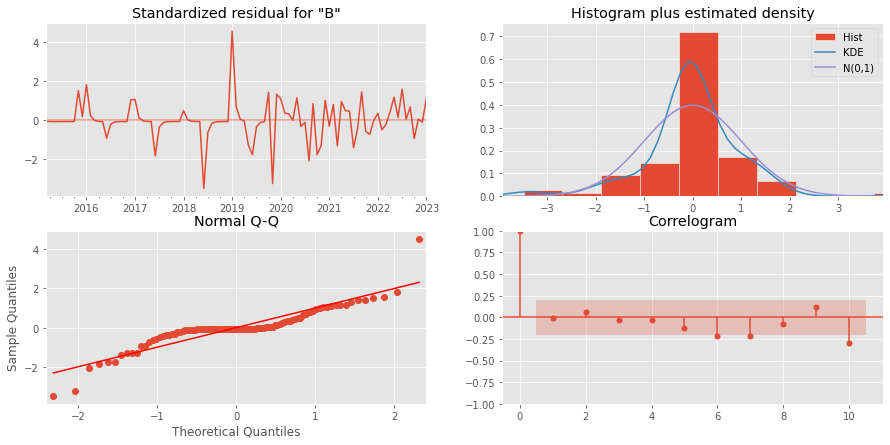

In [112]:
arma.plot_diagnostics();

In [113]:
predictions

,Bamenda.price,py_snaive,py_hw,LAdA,XGBOOST,SARIMA
date_,,,,,,
2023-03-31,6375.0,3450.0,6043.115287,5913.160297,4505.442203,5213.020953
2023-04-30,6125.0,3600.0,6180.523235,5950.478136,4054.917640,5249.982987
2023-05-31,6375.0,4000.0,6253.618884,5991.216739,4339.288636,5287.403527
2023-06-30,5600.0,4000.0,5917.425270,5647.870941,4339.288636,5325.290720


In [ ]:
accuracy(predictions['Bamenda.price'], predictions['SARIMA'])

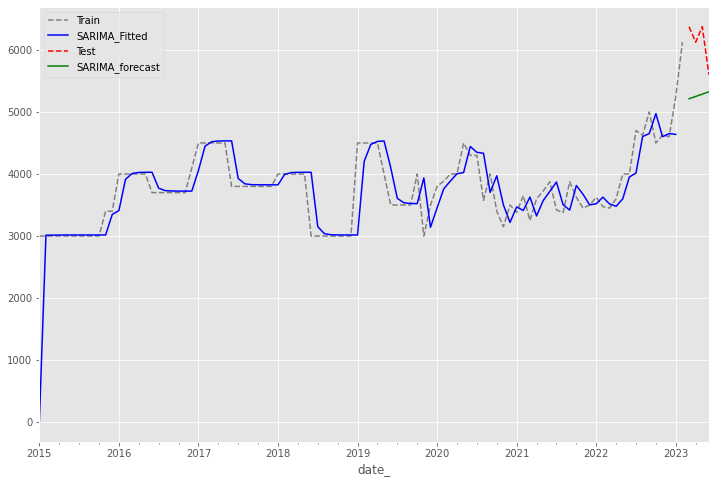

In [116]:
#Plotting
X__na["Bamenda.price"].plot(figsize=(12,8), style="--", color="gray", legend=True, label="Train")
slog_fitted_inv_.plot(color="b", legend=True, label="SARIMA_Fitted")
predictions["Bamenda.price"].plot(style="--",color="r", legend=True, label="Test")
predictions["SARIMA"].plot(color="green", legend=True, label="SARIMA_forecast");

In [207]:
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

def mape(A, F):
    return np.round(np.mean(np.abs((np.array(A) - np.array(F)) / np.array(A))) * 100,1)

In [209]:
print(math.sqrt(mean_squared_error(predictions["Kananga_Maize_meal_price"].values, predictions['SARIMA'])))
print(smape(predictions["Kananga_Maize_meal_price"], predictions['SARIMA']))
print(mape(predictions["Kananga_Maize_meal_price"], predictions['SARIMA']))

1545.4423718853177
28.13947345234421
24.5


#### Comparison

In [79]:
forecasts = predictions.copy()
fc_melt=pd.melt(forecasts.reset_index(), 
        id_vars='period_date', 
        value_vars=forecasts.columns,
        var_name="Model", 
        value_name="Forecasts").round(0)

fc_melt.head()

,period_date,Model,Forecasts
0,2022-11-30,Kananga_Maize_meal_price,3363.0
1,2022-12-31,Kananga_Maize_meal_price,1649.0
2,2023-01-31,Kananga_Maize_meal_price,1480.0
3,2023-02-28,Kananga_Maize_meal_price,1705.0
4,2023-03-31,Kananga_Maize_meal_price,2052.0


In [83]:
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['period_date'], empty='none')

# The basic line
line = alt.Chart(fc_melt).mark_line(point=True).encode(
    x='period_date',
    y=alt.Y('Forecasts:Q',scale=alt.Scale(domain=[500,4000], clamp=True)),
    color='Model:N',
    tooltip=['period_date','Forecasts','Model']
)

# Transparent selectors across the chart. This is what tells us
# the x-value of the cursor
selectors = alt.Chart(fc_melt).mark_point().encode(
    x='period_date',
    opacity=alt.value(0),
).add_selection(
    nearest
)

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = line.mark_text(align='left', baseline='top', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'Forecasts:Q', alt.value('              '))
)
text2 = line.mark_text(align='left', baseline='bottom', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'Model:N', alt.value('    '))
)

# Draw a rule at the location of the selection
rules = alt.Chart(fc_melt).mark_rule(color='gray').encode(
    x='period_date',
).transform_filter(
    nearest
)

# Put the five layers into a chart and bind the data
alt.layer(
    line, selectors, points, rules, text, text2
).properties(
    width=800, height=500, title="Comaprison of various Forecasting Models"
).interactive()

alt.LayerChart(...)